In [ ]:
import pandas as pd
import itertools
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier
run=False

In [ ]:
waves=pd.read_csv('waves.csv')['Wavelength (nm)'].to_list()

In [104]:
# # 3.12
# # import numpy as np
# # import matplotlib.pyplot as plt
# # import matplotlib.cm as cm
# # from matplotlib.colors import LinearSegmentedColormap

# # # Definição das cores: Azul → Preto
# # colors = ['#0000FF', '#000000']

# # # Cria o colormap
# # cmap_blue2black = LinearSegmentedColormap.from_list(
# #     'blue2black',
# #     colors,
# #     N=256
# # )

# # # Registra no módulo cm (versões mais antigas)
# # cm.register_cmap(name='blue2black', cmap=cmap_blue2black)

# # # Gera dados de exemplo
# # data = np.linspace(0, 1, 100).reshape(10, 10)

# # # Faz o plot
# # plt.imshow(data, cmap='blue2black')
# # plt.colorbar()
# # plt.title("Colormap: blue2black")
# # plt.show()
# # 3.9
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# # 1) Defina as cores que quer usar: do mais claro ao mais escuro
# colors = [
#     '#00A86B',  # lightblue
#     '#00008B',  # darkblue

# ]

# # 2) Crie um colormap customizado de 256 tons
# cmap_blue2black = LinearSegmentedColormap.from_list(
#     'green2blue1',    # nome interno
#     colors,          # lista de cores
#     N=256            # número de níveis (256 é o padrão para gradientes suaves)
# )

# # (Opcional) registre globalmente para chamar só por nome depois:
# plt.register_cmap(name='green2blue1', cmap=cmap_blue2black)


In [105]:
df_uvvis=pd.read_csv('dados.csv',index_col='Unnamed: 0').drop(['Material','group'],axis=1)
df_xrf=pd.read_csv('dados_xrf.csv',index_col='Unnamed: 0')
df_uvvis_teste=pd.read_csv('dados_teste.csv',index_col='Unnamed: 0').drop(['Material','group'],axis=1)
df_xrf_teste=pd.read_csv('dados_xrf_teste.csv',index_col='Unnamed: 0')

In [106]:
df=pd.concat([df_xrf,df_uvvis],axis=1)
df_teste=pd.concat([df_xrf_teste,df_uvvis_teste],axis=1)

In [107]:
df_total=pd.concat([df,df_teste],axis=0)

In [109]:
group_mass=['Mass']
group_ref=["ref_val_"+str(x) for x in range(3648)]
group_col=["col_val_"+str(x) for x in range(3648)]
group_col_cord=["X","Y","Z"]
group_UV_VIS=group_ref+group_col_cord#+group_col
elements=['Mg', 'Al', 'Si', 'P ', 'S ', 'Cl', 'K ', 'Ca', 'Ti', 'V ', 'Cr',
       'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'As', 'Se', 'Rb', 'Sr', 'Y ',
       'Zr', 'Nb', 'Mo', 'Ag', 'Cd', 'Sn', 'Sb', 'Ba', 'La', 'Ce', 'Pr',
       'Nd', 'W ', 'Au', 'Hg', 'Pb', 'Bi', 'Th', 'U ', 'LE']
group_concentration_xrf=[e.strip()+' Concentration'for e in elements]
group_error_xrf=[e.strip()+' Error1s'for e in elements]
group_xrf=list(itertools.chain(*zip([e.strip()+' Concentration'for e in elements],[e.strip()+' Error1s'for e in elements])))
group_year=['Year']
group_sec=['Seculo']

In [110]:
import numpy as np

In [111]:
import numpy as np

# EDA - XRF

In [114]:
### Considerar os <LOD infinitéssimos e substitui-los por zero

In [115]:
# Passo 1: substituir '<LOD' por NaN e converter para float
xrf_data = df_total[group_xrf].replace('<LOD', np.nan).astype('float64')

# Passo 2: identificar o elemento com maior concentração em cada linha
max_elements = xrf_data.idxmax(axis=1)

# Passo 3: agrupar os índices por nome do elemento
grouped_indices = max_elements.groupby(max_elements).apply(lambda x: x.index.tolist())

grouped_indices

Ag Concentration    [2_m01, 2_m02, 2_m03, 2_m04, 2_m05, 2_m06, 2_m...
Al Concentration                         [7_m16, 7_m17, 7_m18, 9_m27]
Au Concentration    [1_m01, 1_m02, 1_m03, 1_m04, 1_m05, 1_m06, 1_m...
Cu Concentration    [4_m01, 4_m03, 4_m04, 4_m05, 4_m06, 4_m07, 4_m...
dtype: object

In [116]:
df_eda_con=df_total[group_concentration_xrf].replace('<LOD', 0).fillna(0).astype('float64')

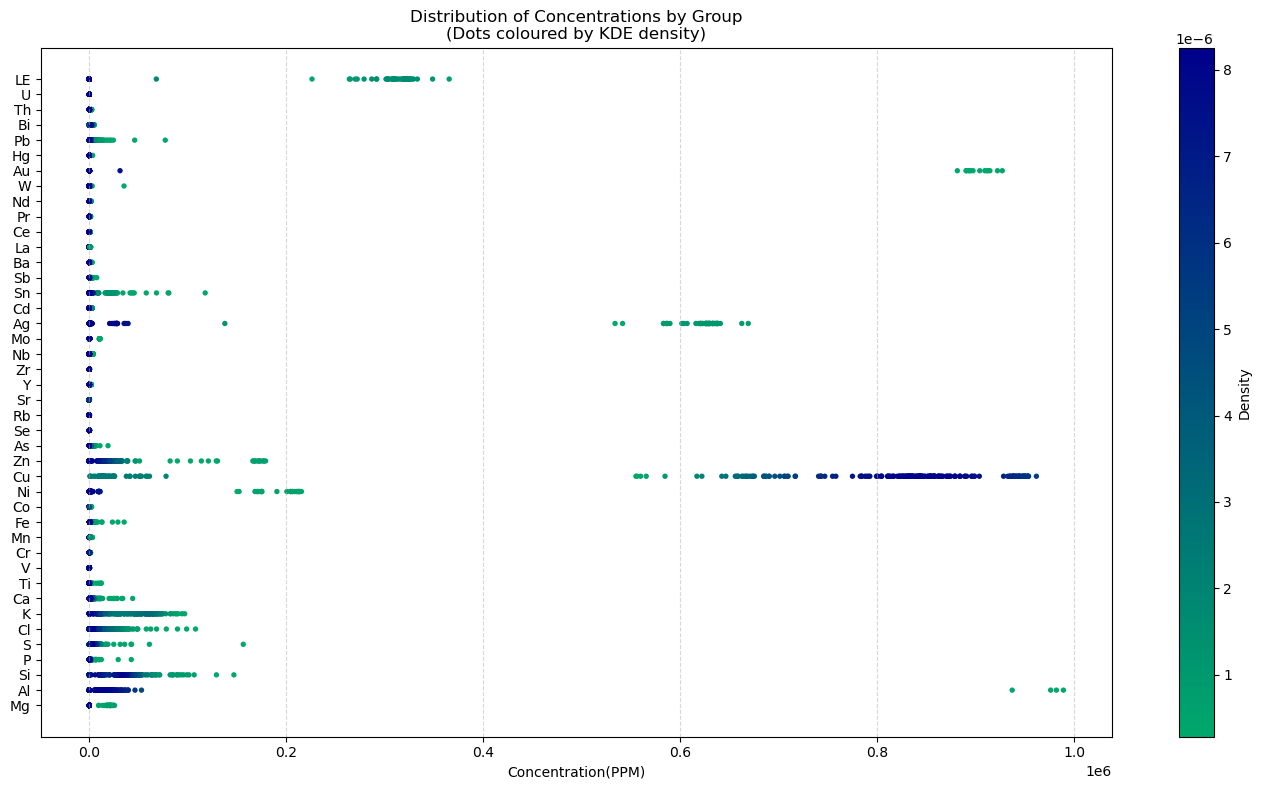

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm

features = df_eda_con.columns
plt.figure(figsize=(14, 8))

for i, col in enumerate(features):
    # 1) Extrair valores não-nulos
    vals = df_eda_con[col].dropna().values
    
    # 2) Ajustar KDE univariada
    kde = gaussian_kde(vals)
    
    # 3) Avaliar densidade em cada ponto
    dens = kde(vals)
    
    # 4) Criar vetor y fixo para “alinhar” na linha i
    y = np.full_like(vals, i, dtype=float)
    
    # 5) Scatter colorido pela densidade
    sc = plt.scatter(vals, y, c=dens, cmap='green2blue1', s=15, edgecolors='none')

# Ajustes finais
plt.yticks(range(len(features)), pd.Series(features).apply(lambda x: x.split(' ')[0]).to_list())
plt.xlabel("Concentration(PPM)")
plt.title("Distribution of Concentrations by Group\n(Dots coloured by KDE density)")
cbar = plt.colorbar(sc, label="Density")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



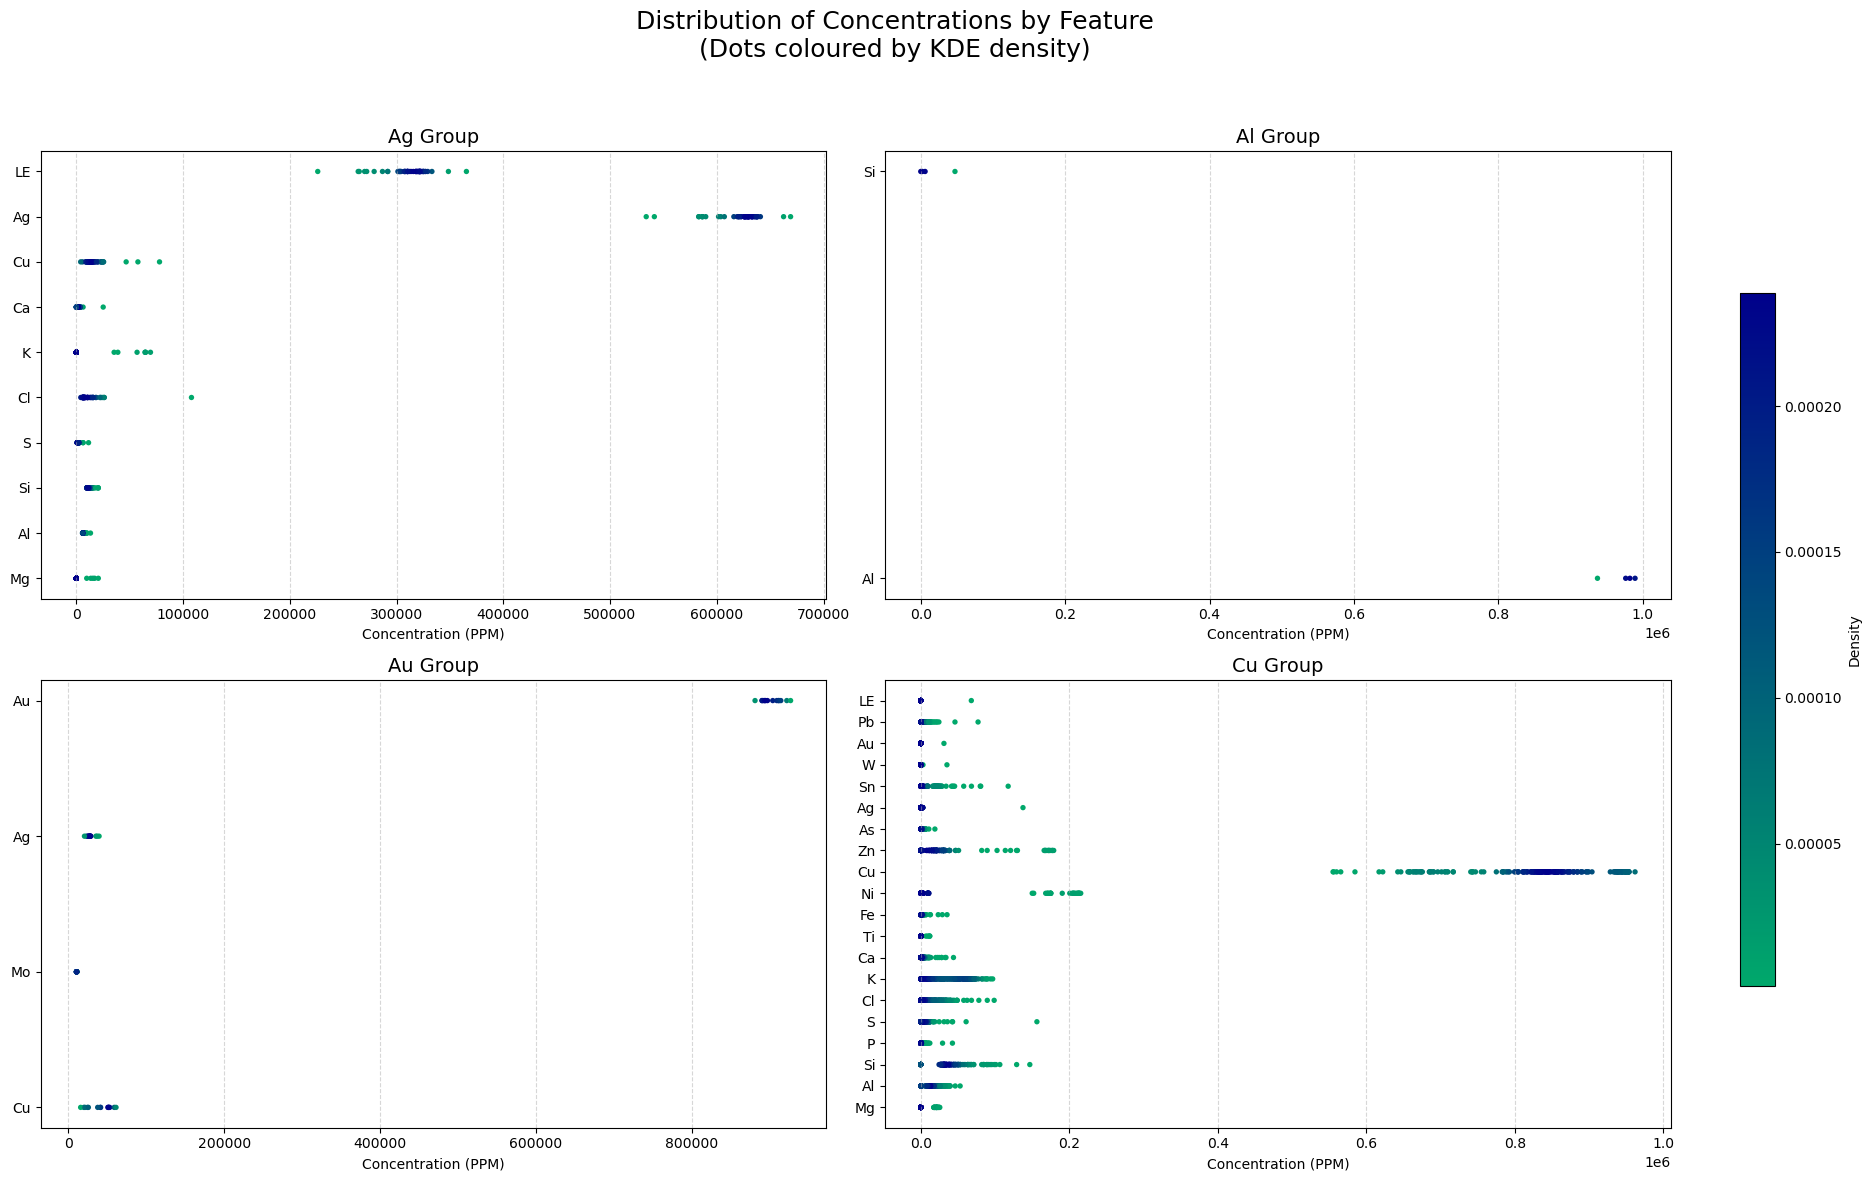

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1) Garanta que o índice do DataFrame corresponde aos rótulos em grouped_indices
#    Por exemplo, se suas amostras têm nomes como '1_m01', etc., defina:
#       df_eda_con.index = sample_ids_list  # lista com todos os rótulos na mesma ordem do DataFrame

# 2) Defina seu grouped_indices e group_names:
# grouped_indices = [
#     ['1_m01', '1_m02', ...],  # Ouro
#     ['2_m01', '2_m02', ...],  # Prata
#     ['3_m01', '3_m02', ...],  # Cobre
#     ['4_m01', '4_m02', ...],  # Outros
# ]


threshold_ppm = 10000  # limite de significância em ppm

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for ax, indices, name in zip(axes, grouped_indices, group_names):
    # 3) Filtrar linhas por rótulo usando .loc
    df_sub = df_eda_con.loc[indices]
    
    low_cols = []
    high_cols = []
    for col in df_sub.columns:
        vals = df_sub[col].dropna().values
        if vals.size >= 0 and vals.max() >= threshold_ppm:
            high_cols.append(col)
        else:
            low_cols.append(col)
    
    line_idx = 0
    yticklabels = []
    sc = None
    
    # 4) Plotar materiais de alta concentração
    for col in high_cols:
        vals = df_sub[col].dropna().values
        dens = gaussian_kde(vals)(vals)
        y = np.full_like(vals, line_idx, dtype=float)
        sc = ax.scatter(vals, y, c=dens, cmap='green2blue1', s=15, edgecolors='none')

        yticklabels.append(col.split(' ')[0])
        line_idx += 1
    
    # # 5) Agregar materiais de baixa concentração em "Outros Materiais"
    # if low_cols:
    #     low_vals = np.concatenate([
    #         df_sub[c].dropna().values for c in low_cols if df_sub[c].dropna().size > 0
    #     ])
    #     if low_vals.size > 0:
    #         dens = gaussian_kde(low_vals)(low_vals)
    #         y = np.full_like(low_vals, line_idx, dtype=float)
    #         sc = ax.scatter(low_vals, y, c=dens, cmap='green2blue1', s=15, edgecolors='none')
    #         yticklabels=["Other Materials"]+yticklabels
    
    # 6) Ajustes de eixo
    ax.set_yticks(range(len(yticklabels)))
    ax.set_yticklabels(yticklabels)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Concentration (PPM)")
    ax.grid(axis='x', linestyle='--', alpha=0.5)

# 7) Título geral e colorbar
fig.suptitle("Distribution of Concentrations by Feature\n(Dots coloured by KDE density)", fontsize=18)
fig.tight_layout(rect=[0, 0, 1, 0.95])

if sc is not None:
    cbar = fig.colorbar(sc, ax=axes, label="Density", orientation='vertical', fraction=0.02, pad=0.04)

plt.show()

In [121]:
group_names=[e[:2]+' Group' for e in grouped_indices.index]

In [122]:
group_names

['Ag Group', 'Al Group', 'Au Group', 'Cu Group']

In [123]:
df_group_xrf_year=df_total[group_concentration_xrf+group_year].replace('<LOD', 0).fillna(0).astype('float64')

In [124]:
group_names

['Ag Group', 'Al Group', 'Au Group', 'Cu Group']

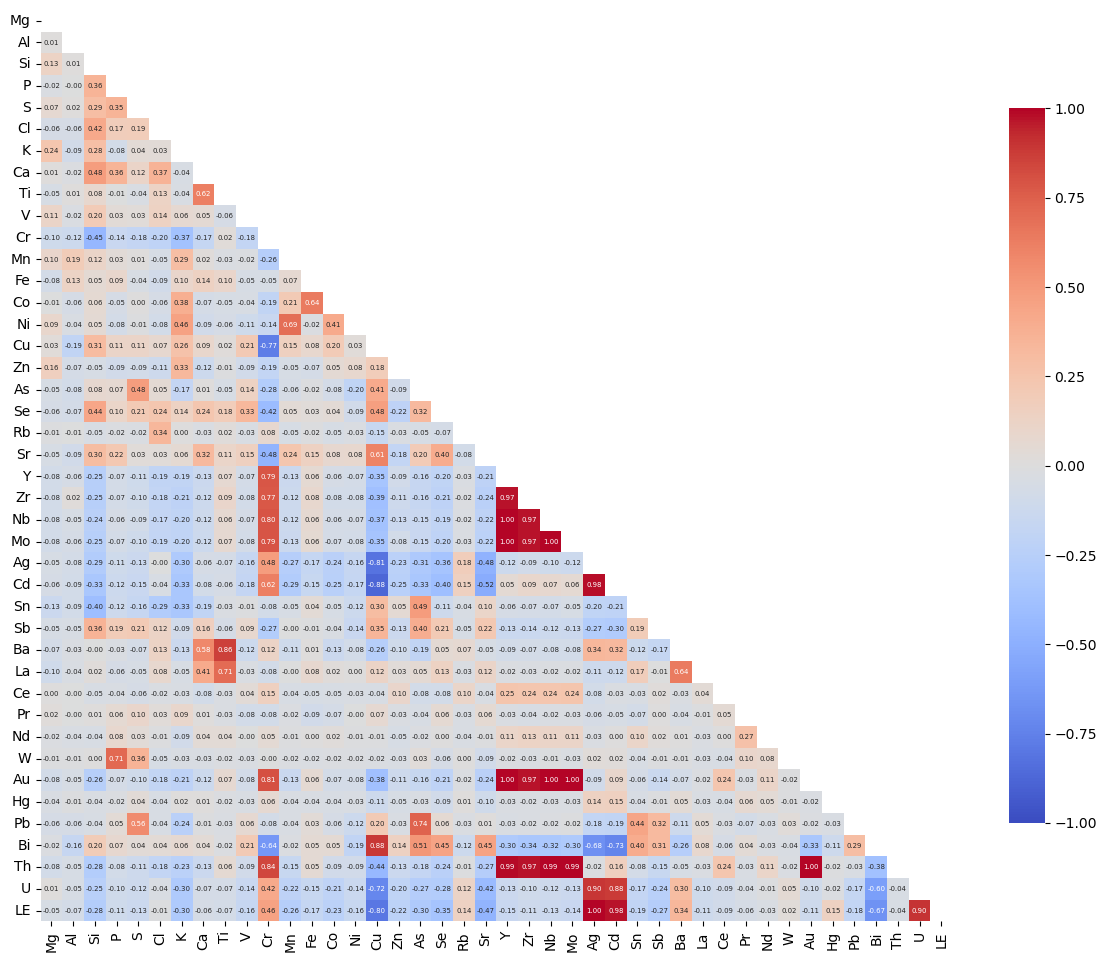

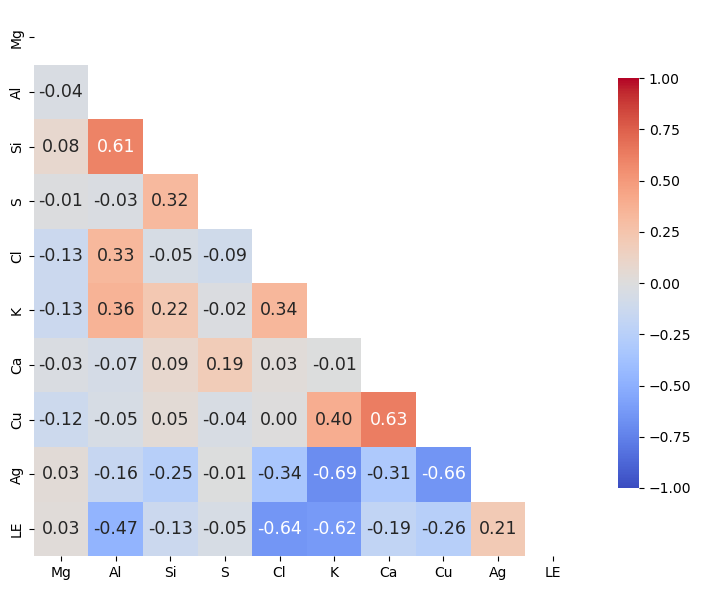

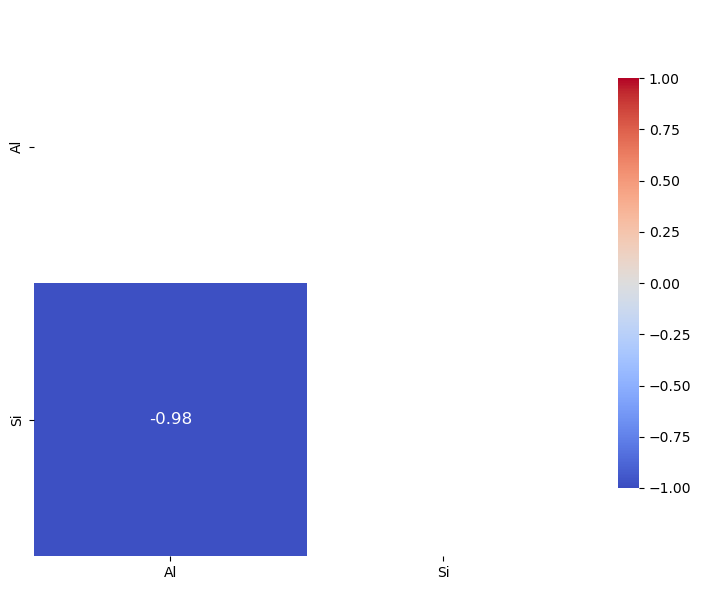

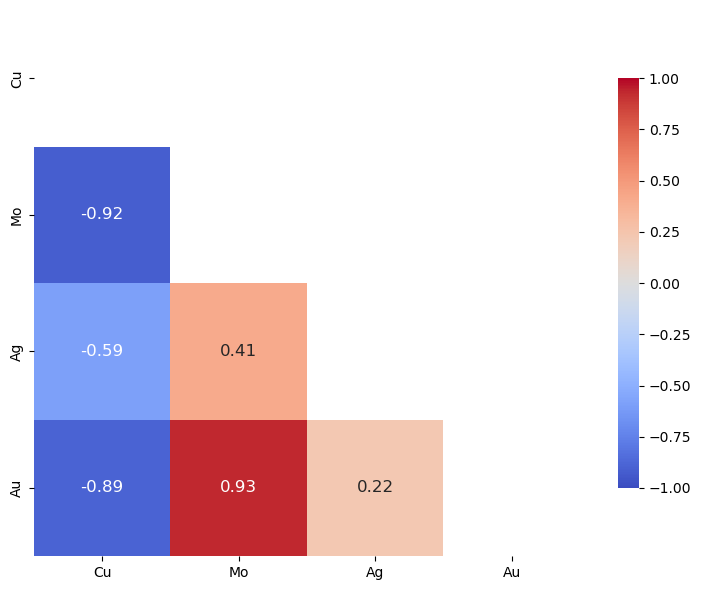

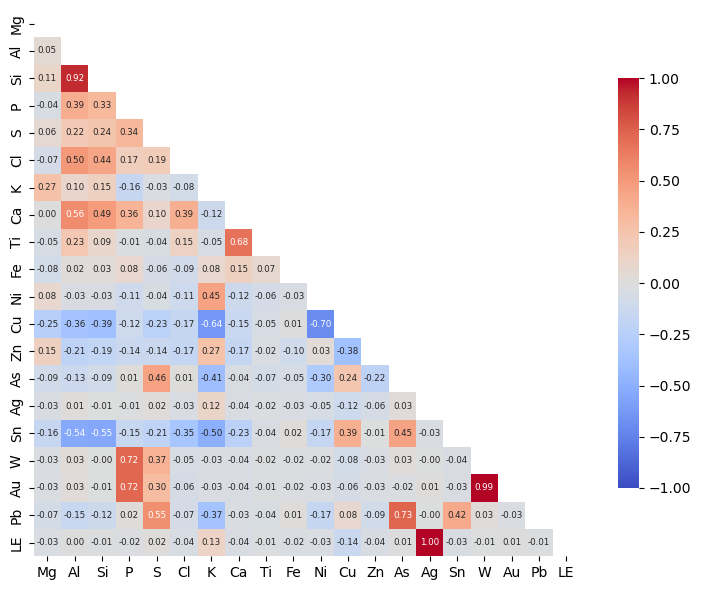

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Configurações ===
threshold_ppm = 10000  # concentração mínima para considerar coluna significativa

# Pré-requisitos:
# - df_group_xrf_year: DataFrame com colunas de concentração e 'Year'.
# - Índice do df_group_xrf_year deve conter os rótulos de amostra usados em grouped_indices.
# - grouped_indices: lista de listas com labels de amostras por grupo.\# - group_names: lista de nomes string para cada grupo.

# 1) Heatmap global de correlação (exclui 'Year'), só triângulo inferior, com valores anotados
numeric_cols = [col for col in df_group_xrf_year.columns if col != 'Year']
corr_full = df_group_xrf_year[numeric_cols]
corr_full.columns = pd.Series(numeric_cols).apply(lambda x: x.split(' ')[0]).to_list()
corr_full = corr_full.corr()
mask_full = np.triu(np.ones_like(corr_full, dtype=bool))  # mascara triângulo superior, inclui diagonal
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_full,
    mask=mask_full,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={'fontsize':5},
    cbar_kws={'shrink': .75}
)
#plt.title('Heatmap of Correlation - All samples')
plt.tight_layout()
plt.show()

# 2) Heatmaps separados por grupo (triângulo inferior + anotação)
for indices, name in zip(grouped_indices, group_names):
    df_sub = df_group_xrf_year.loc[indices]
    sig_cols = [col for col in numeric_cols if df_sub[col].dropna().max() >= threshold_ppm]

    if not sig_cols:
        print(f"{name}: sem colunas significativas (>= {threshold_ppm} ppm)")
        continue

    corr_sub = df_sub[sig_cols]
    corr_sub.columns = pd.Series(sig_cols).apply(lambda x: x.split(' ')[0]).to_list()
    corr_sub = corr_sub.corr()
    mask_sub = np.triu(np.ones_like(corr_sub, dtype=bool))
    if len(sig_cols)<=5:
        t=12
    else:
        t=125/len(sig_cols)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr_sub,
        mask=mask_sub,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        square=True,
        annot=True,
        fmt='.2f',
        annot_kws={'fontsize': t},
        cbar_kws={'shrink': .75}
        
    )
    
    #plt.title(f'Heatmap of Correlation - {name}\n(Significant over {threshold_ppm} ppm)')
    plt.tight_layout()
    plt.show()


In [129]:
for e in range(df_eda_con.shape[1]//10+1):
    display(df_eda_con.describe().iloc[:,e*10:(e+1)*10])

,Mg Concentration,Al Concentration,Si Concentration,P Concentration,S Concentration,Cl Concentration,K Concentration,Ca Concentration,Ti Concentration,V Concentration
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,2201.701493,25438.179104,27547.164179,1107.735075,5019.992537,12814.720149,24960.235075,2932.503731,263.626866,14.104478
std,6341.697417,117052.922424,25366.463747,3545.179506,11436.621882,16549.635972,27788.862142,5683.259710,1449.220765,41.709315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5949.250000,8777.250000,0.000000,913.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,10031.500000,28643.500000,262.000000,2531.500000,7046.500000,12088.500000,1505.500000,0.000000,0.000000
75%,0.000000,16120.250000,38940.500000,808.000000,5904.000000,19650.500000,49328.750000,2889.000000,0.000000,0.000000
max,25626.000000,989148.000000,146827.000000,42642.000000,156359.000000,107876.000000,96841.000000,44041.000000,12130.000000,179.000000


,Cr Concentration,Mn Concentration,Fe Concentration,Co Concentration,Ni Concentration,Cu Concentration,Zn Concentration,As Concentration,Se Concentration,Rb Concentration
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,179.503731,256.078358,1610.888060,146.794776,18051.261194,624120.809701,18048.884328,1322.235075,37.597015,2.335821
std,231.423222,450.906965,3393.971646,296.991745,54852.100839,358393.637509,37824.341718,1991.913051,42.159519,24.461831
min,0.000000,0.000000,176.000000,0.000000,0.000000,618.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,95.250000,407.000000,51.500000,130.500000,435799.000000,0.000000,0.000000,0.000000,0.000000
50%,76.000000,187.000000,812.500000,96.000000,540.500000,821409.000000,377.500000,342.000000,35.000000,0.000000
75%,143.000000,232.250000,1675.250000,118.250000,1117.750000,859502.000000,20976.250000,2194.750000,56.250000,0.000000
max,1234.000000,3178.000000,35388.000000,2317.000000,215374.000000,961719.000000,178999.000000,19013.000000,313.000000,397.000000


,Sr Concentration,Y Concentration,Zr Concentration,Nb Concentration,Mo Concentration,Ag Concentration,Cd Concentration,Sn Concentration,Sb Concentration,Ba Concentration
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,12.858209,129.835821,7.552239,228.649254,710.854478,115944.705224,497.817164,5701.354478,585.850746,137.791045
std,12.862367,416.652914,31.793827,841.429048,2317.281522,239443.303403,954.001873,13938.444563,1018.960357,353.528105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,145.000000,259.250000,0.000000,157.500000,0.000000,0.000000
50%,16.000000,40.000000,0.000000,0.000000,181.000000,892.500000,0.000000,331.000000,215.500000,0.000000
75%,23.250000,55.000000,0.000000,79.000000,231.250000,2602.000000,0.000000,2059.500000,584.000000,231.750000
max,78.000000,1996.000000,203.000000,3962.000000,10993.000000,669118.000000,2968.000000,117674.000000,7576.000000,2879.000000


,La Concentration,Ce Concentration,Pr Concentration,Nd Concentration,W Concentration,Au Concentration,Hg Concentration,Pb Concentration,Bi Concentration,Th Concentration
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,78.712687,98.899254,152.619403,270.432836,230.029851,47316.958955,25.600746,2868.414179,1775.238806,127.809701
std,227.027633,211.915115,321.963831,504.950859,2165.200614,201303.462133,251.673234,6550.221931,1260.618516,477.109537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,221.750000,548.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,837.000000,2049.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,70.250000,0.000000,2671.000000,2619.500000,4.250000
max,1433.000000,1037.000000,1535.000000,2003.000000,35236.000000,927064.000000,3470.000000,77127.000000,5298.000000,2428.000000


,U Concentration,LE Concentration
count,268.000000,268.000000
mean,3.973881,56928.145522
std,9.371008,120381.861715
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,50.000000,365435.000000


In [ ]:
for e in grouped_indices.index:
    print(e,len(grouped_indices[e]))

Ag Concentration 49
Al Concentration 4
Au Concentration 14
Cu Concentration 201


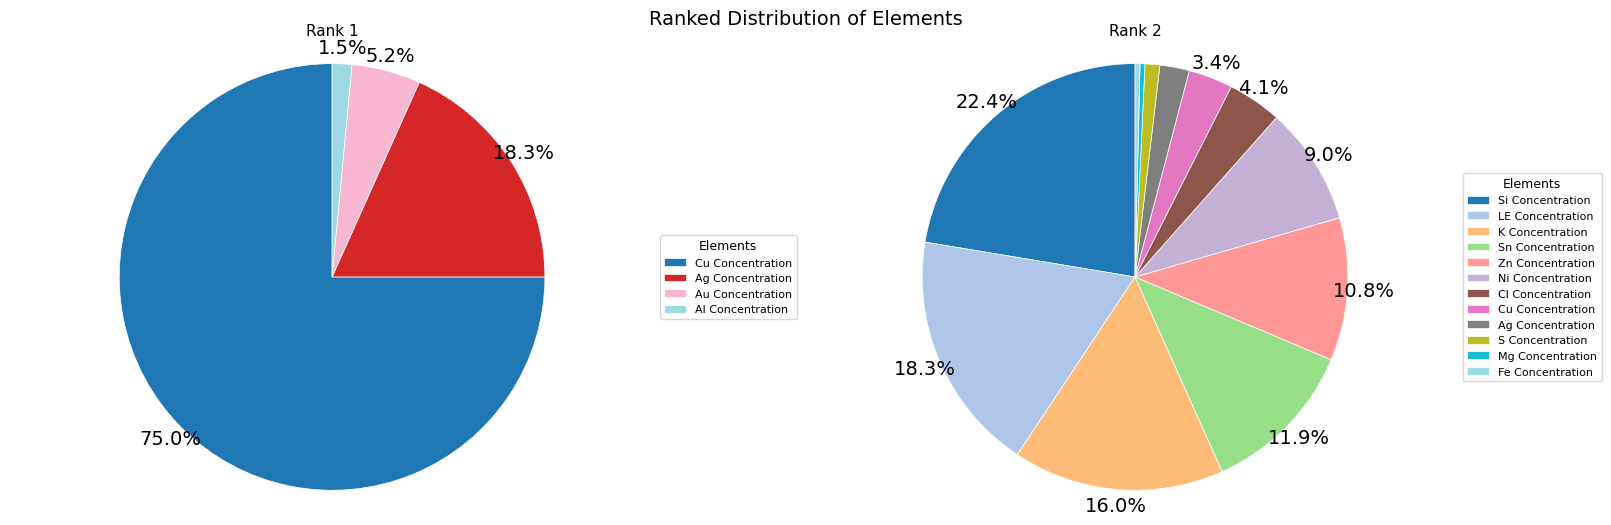

In [157]:
import matplotlib.pyplot as plt
import numpy as np

def rank_dataset_by_row(df):
    ranked_df = df.apply(lambda row: row.rank(method='min', ascending=False), axis=1)
    ranked_df = ranked_df.apply(lambda row: row.mask(row == row.max(), 0), axis=1)
    return ranked_df

ranked_df = rank_dataset_by_row(df_eda_con)
fig, axs = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)

for e, ax in zip(range(1, 3), axs):
    v = ranked_df[ranked_df == e].sum(axis=0)
    v = v[v != 0]
    v = v.sort_values(ascending=False)

    values = v.values
    labels = v.index

    cmap = plt.get_cmap('tab20')
    colors = cmap(np.linspace(0, 1, len(values)))

    def autopct_func(pct):
        if e == 2 and pct < 3:
            return ''
        return f'{pct:.1f}%'

    wedges, texts, autotexts = ax.pie(
        values,
        colors=colors,
        radius=0.8,
        startangle=90,
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
        autopct=autopct_func,
        pctdistance=1.075,
        textprops={'fontsize': 14, 'color': 'black'}
    )

    ax.set_title(f'Rank {e}', fontsize=11, pad=5)
    ax.axis('equal')

    ax.legend(
        wedges,
        labels,
        title='Elements',
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=8,
        title_fontsize=9,
        frameon=True
    )

fig.suptitle('Ranked Distribution of Elements', fontsize=14, y=1.02)
plt.show()


# Análise da Amostras - Reflectance

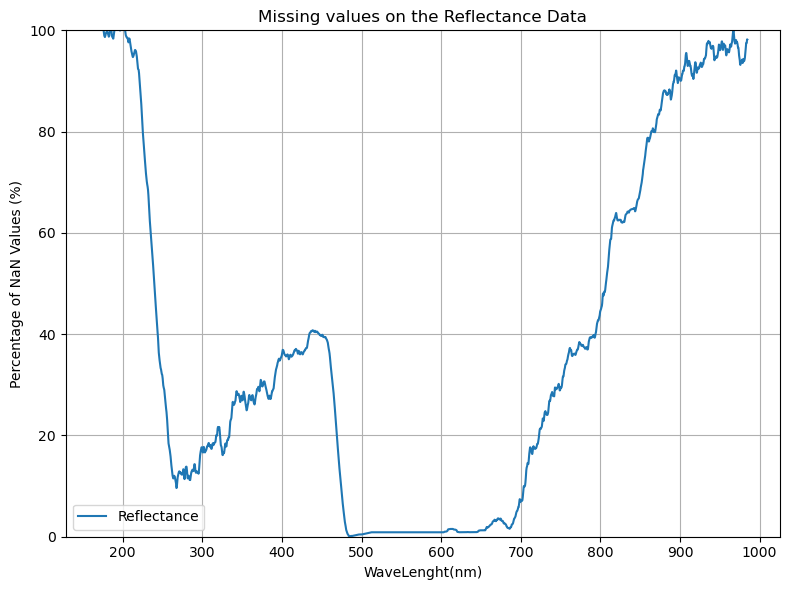

In [ ]:
ref_counts = (df_total[group_ref].isna().sum(axis=0)).to_list()

# Corrigir média móvel
ref_series = (pd.Series(ref_counts)/df.shape[0]*100).rolling(window=50, center=True).mean()

# Corrigir eixo x
x = waves

# Plot mais suave
plt.figure(figsize=(8, 6))
plt.plot(x, ref_series, label='Reflectance')
plt.xlabel("WaveLenght(nm)")  # opcional
plt.ylabel("Percentage of NaN Values (%)")  # opcional
plt.title("Missing values on the Reflectance Data")  # opcional
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df1=df[group_ref].copy()

In [132]:
amostra_ouro_r=df[group_ref].loc['1_m06']
amostra_prata_r=df[group_ref].loc['3_m23']
amostra_cobre_r=df[group_ref].loc['7_m28']
amostra_aluminiu_r=df[group_ref].loc['7_m17']

In [ ]:
for e in grouped_indices['Cu Concentration']:
    print(e)
    display(pd.DataFrame(df.loc[e,group_ref]).astype('float64').describe().T)

In [ ]:
waves=pd.read_csv('waves.csv')['Wavelength (nm)'].to_list()

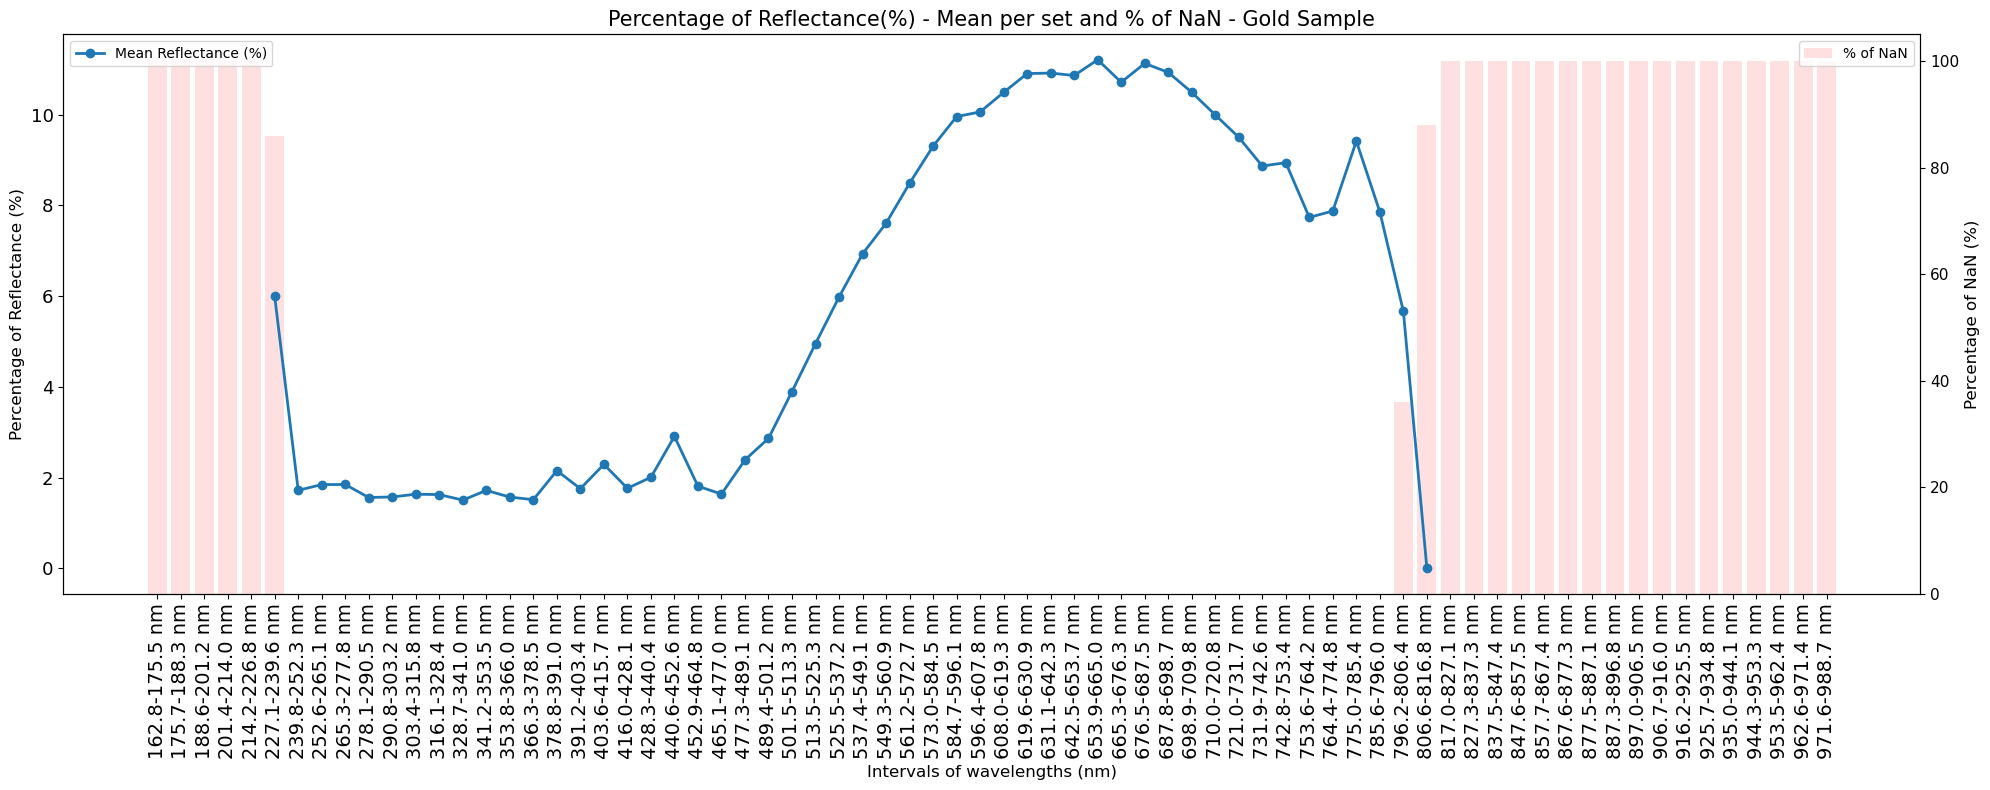

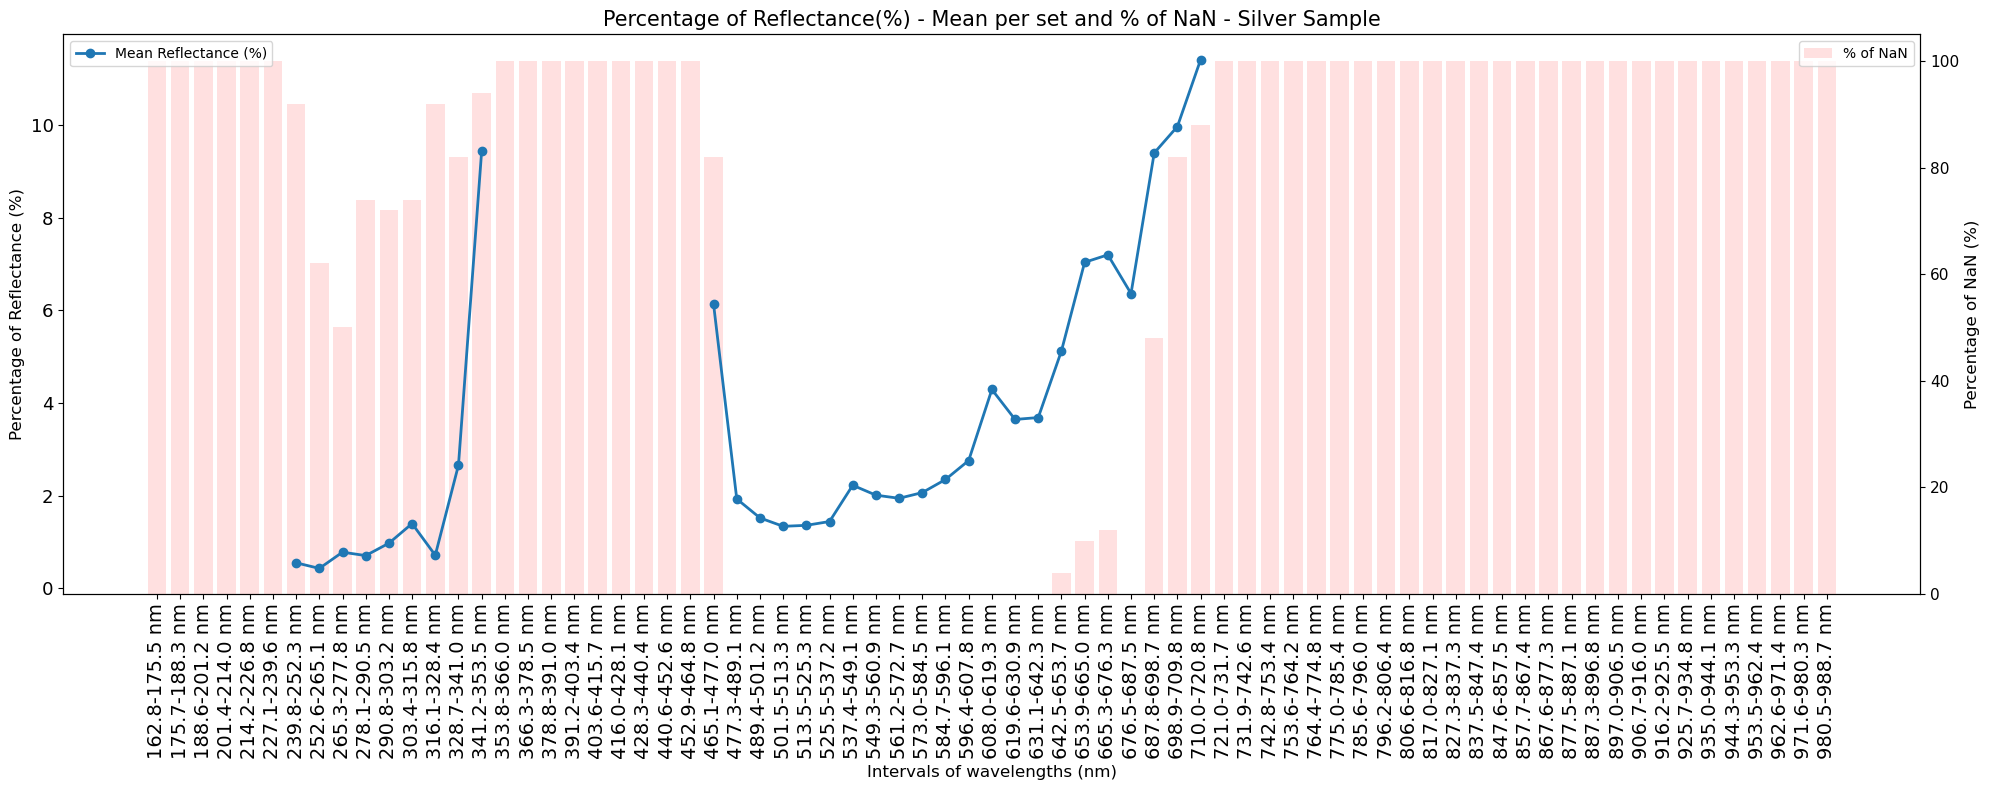

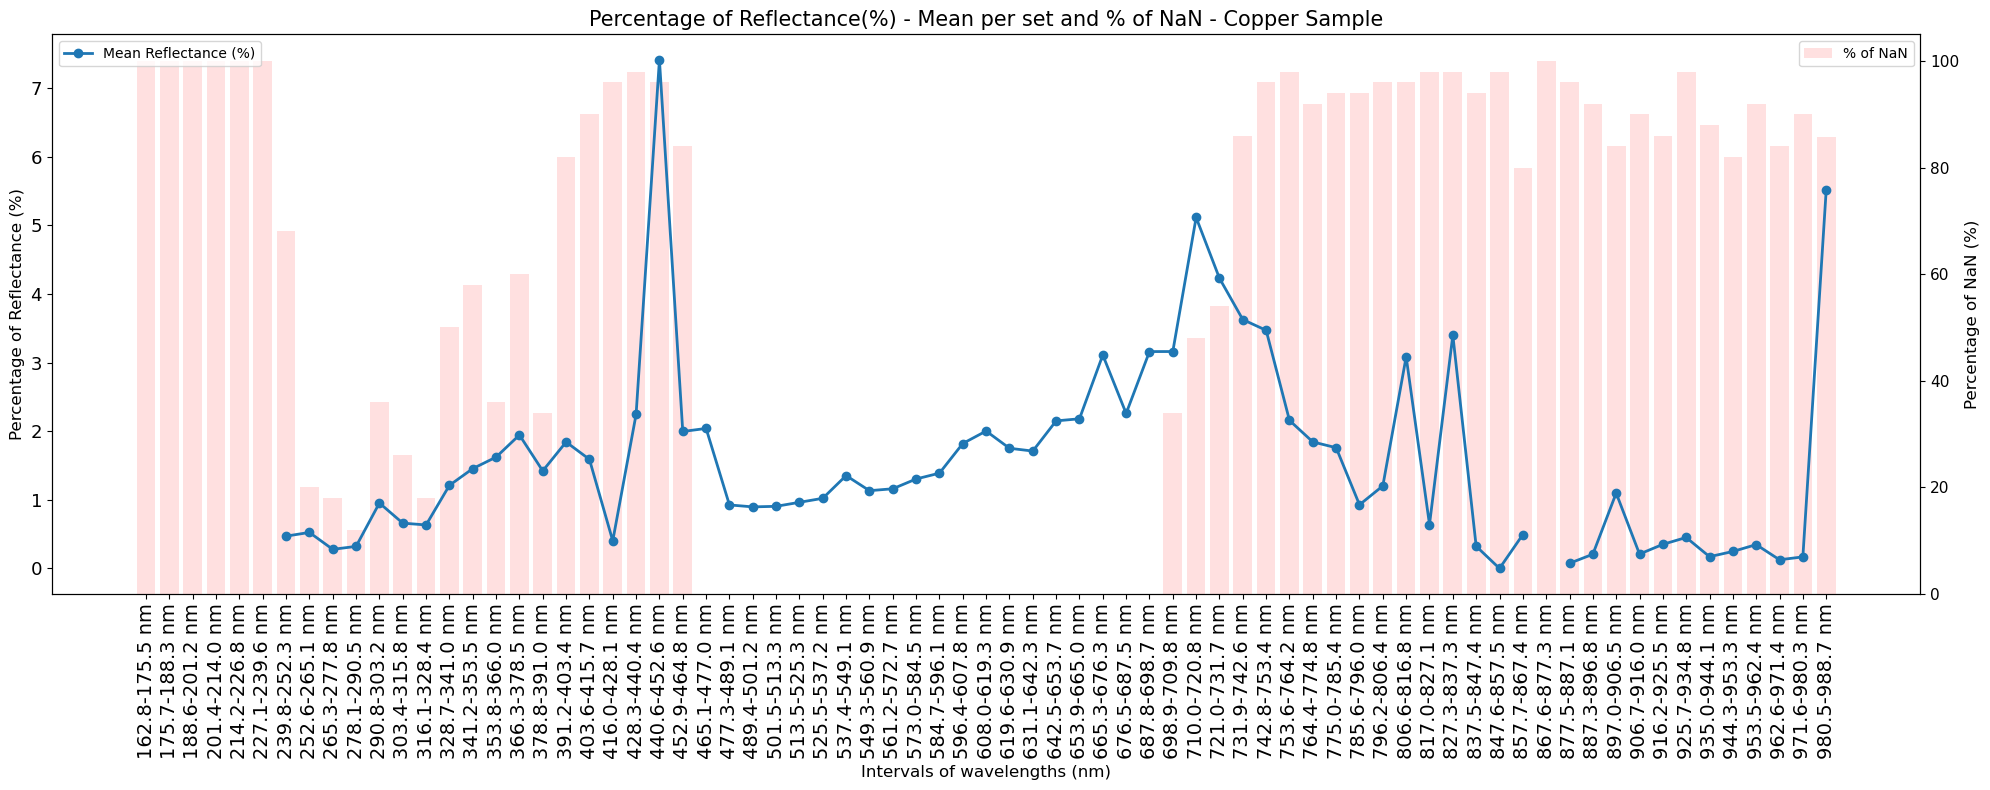

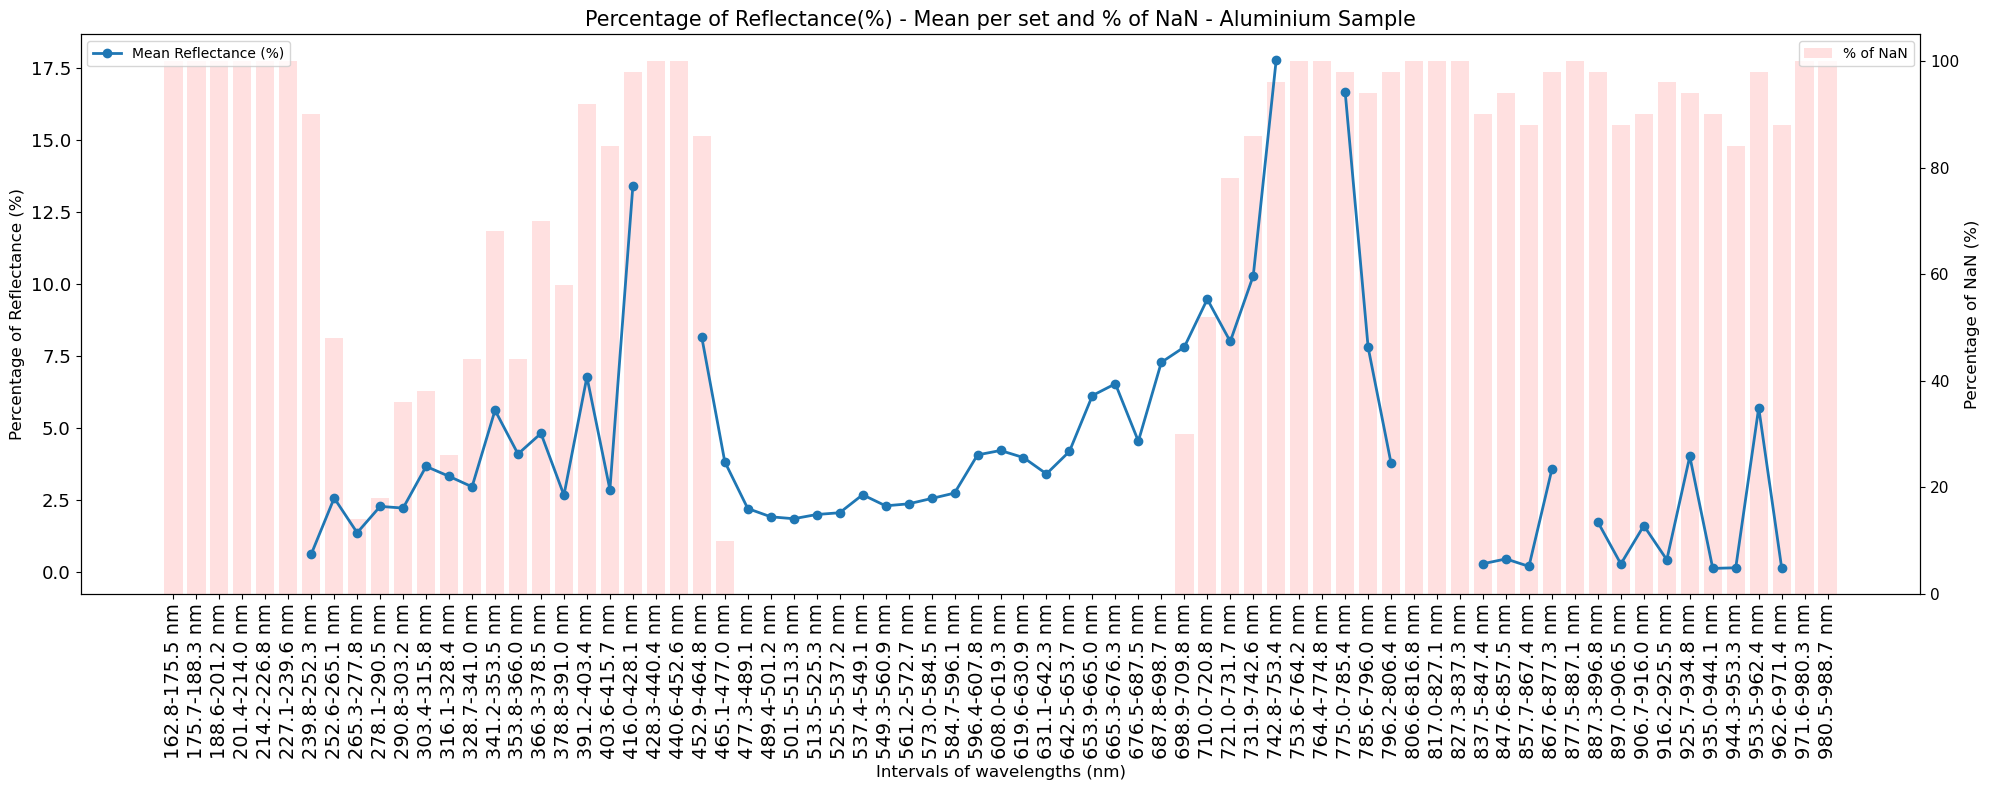

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# Parâmetros do comprimento de onda
wavelength_start = 162.831
wavelength_end = 988.726

for e, name in zip(
    [amostra_ouro_r, amostra_prata_r, amostra_cobre_r, amostra_aluminiu_r],
    ['Gold', 'Silver', 'Copper', 'Aluminium']
):
    dfi=(e if name=='Gold' else e/1000 )
    data_array = np.array((dfi[(dfi<np.percentile(dfi.dropna(),97.5)) | (dfi.isna())]).to_list(), dtype=float)
    wavelengths = np.array(waves, dtype=float)   # usa a tua lista de comprimentos de onda

    n_total = len(data_array)
    group_size = 50

    # quantos grupos completos
    n_groups = n_total // group_size

    group_means = []
    nan_percents = []
    group_labels = []

    # processa grupos completos
    for i in range(n_groups):
        start = i * group_size
        end = (i + 1) * group_size
        group_data = data_array[start:end]
        group_waves = wavelengths[start:end]

        # média ignorando NaN
        valid = group_data[~np.isnan(group_data)]
        group_means.append(np.nan if valid.size == 0 else valid.mean())

        # percentagem de NaN
        pct_nan = np.isnan(group_data).sum() / group_data.size * 100
        nan_percents.append(pct_nan)

        # rótulo pelo intervalo de λ
        w_start, w_end = group_waves[0], group_waves[-1]
        group_labels.append(f"{w_start:.1f}-{w_end:.1f} nm")

    # grupo parcial (se existir resto)
    if n_total % group_size != 0:
        start = n_groups * group_size
        group_data = data_array[start:]
        group_waves = wavelengths[start:]

        valid = group_data  [~np.isnan(group_data)]
        group_means.append(np.nan if valid.size == 0 else valid.mean())

        pct_nan = np.isnan(group_data).sum() / group_data.size * 100
        nan_percents.append(pct_nan)

        w_start, w_end = group_waves[0], group_waves[-1]
        group_labels.append(f"{w_start:.1f}-{w_end:.1f} nm")
        n_groups += 1

    # --- Plot com dois eixos, line sobrepondo as barras ---
    # --- Plot com dois eixos, line sobrepondo as barras ---
    fig, ax1 = plt.subplots(figsize=(20, 8))  # Aumenta o tamanho da figura

    ax2 = ax1.twinx()

    # Ajusta layering dos eixos
    ax1.set_zorder(2)
    ax1.patch.set_visible(False)
    ax2.set_zorder(1)

    # Desenha as barras primeiro (zorder baixo)
    ax2.bar(
        range(n_groups),
        nan_percents,
        width=0.8,                     # Aumenta a largura das barras
        alpha=0.6,
        color='#FFCCCC',
        label='% of NaN',             # Adiciona legenda para as barras
        zorder=1
    )
    ax2.set_ylabel('Percentage of NaN (%)', fontsize=12)
    ax2.tick_params(axis='y', labelsize=11)

    # Depois desenha a linha por cima (zorder mais alto)
    ax1.plot(
        range(n_groups),
        group_means,
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Mean Reflectance (%)', # Adiciona legenda para a linha
        zorder=3
    )
    ax1.set_xlabel('Intervals of wavelengths (nm)', fontsize=12)
    ax1.set_ylabel('Percentage of Reflectance (%)', fontsize=12)
    ax1.tick_params(axis='y', labelsize=13)
    ax1.set_xticks(range(n_groups))
    ax1.set_xticklabels(group_labels, rotation=90, ha='center', fontsize=14)

    plt.title(f"Percentage of Reflectance(%) - Mean per set and % of NaN - {name} Sample", fontsize=15)
    fig.tight_layout()
    ax1.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    plt.show()


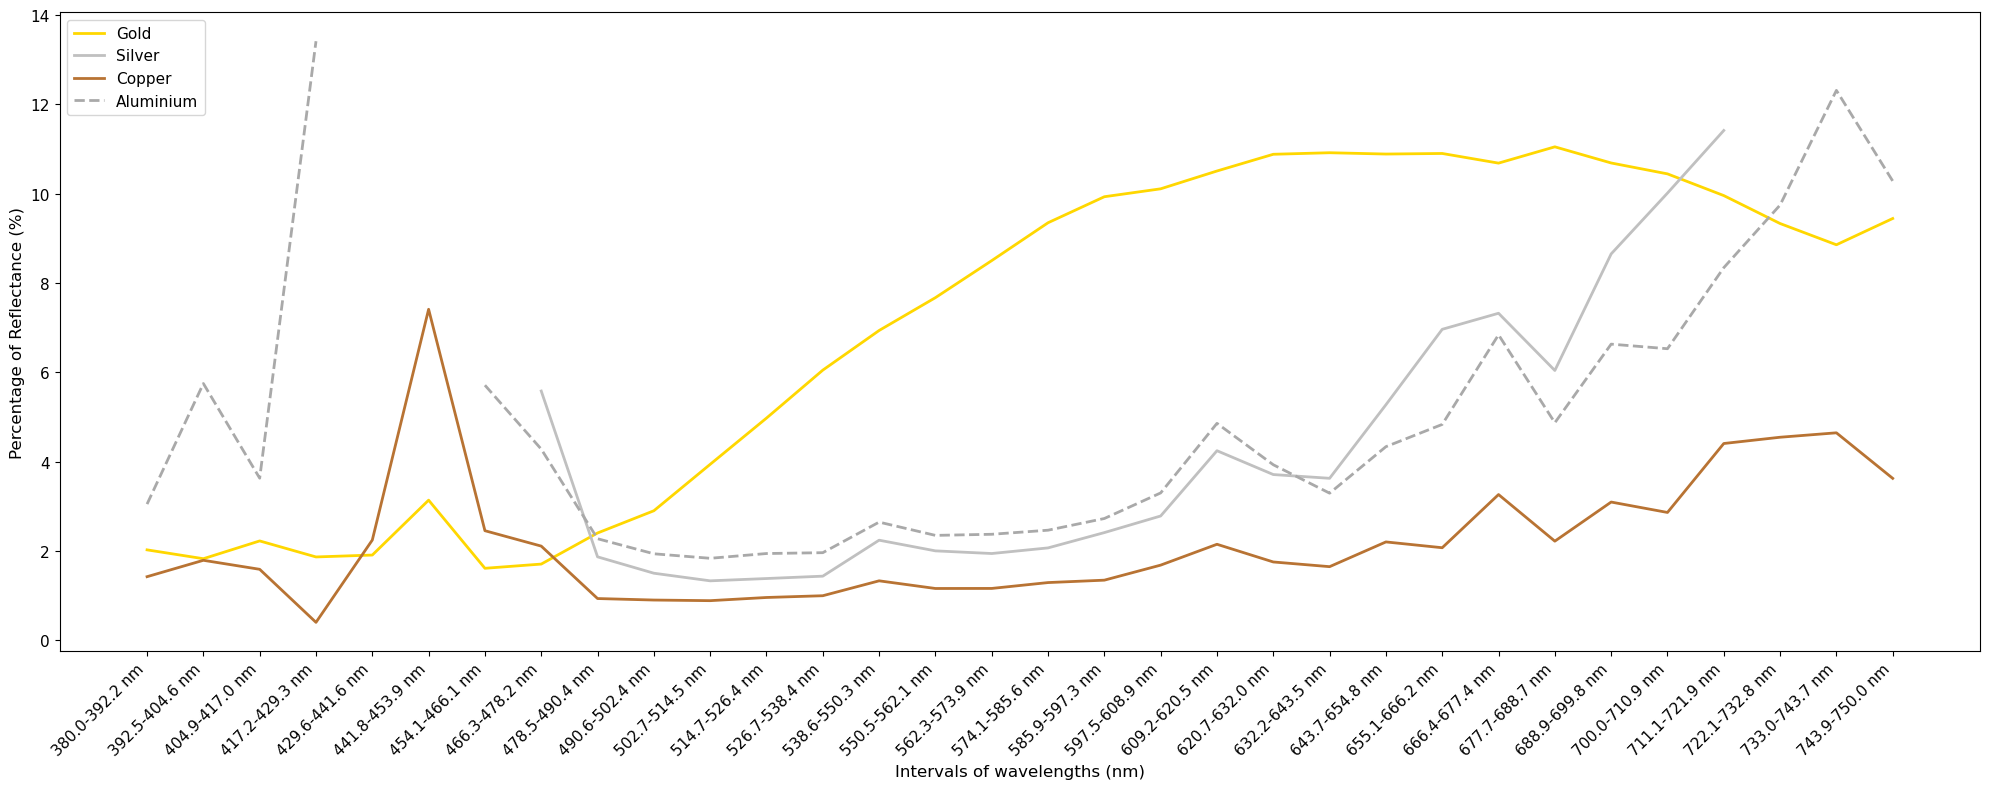

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros de filtro para o campo visível (nm)
visible_start = 380.0
visible_end = 750.0

# Define o tamanho do grupo e converte wavelengths
group_size = 50
wavelengths = np.array(waves, dtype=float)

# Mascara para limitar ao espectro visível
mask = (wavelengths >= visible_start) & (wavelengths <= visible_end)
filtered_waves = wavelengths[mask]

# Ajusta o total e o número de grupos:
n_total = len(filtered_waves)
n_groups = int(np.ceil(n_total / group_size))

# Gera os rótulos dos grupos com intervalo start-end
group_labels = []
for i in range(n_groups):
    start_idx = i * group_size
    end_idx = min((i + 1) * group_size, n_total)
    if start_idx < n_total:
        w_start = filtered_waves[start_idx]
        w_end = filtered_waves[end_idx - 1]
        group_labels.append(f"{w_start:.1f}-{w_end:.1f} nm")

# Cores definidas
element_colors = {
    'Ag Concentration': '#C0C0C0',  # prata
    'Al Concentration': '#A9A9A9',  # alumínio
    'Au Concentration': '#FFD700',  # ouro
    'Cu Concentration': '#B87333',  # cobre
}
name_to_key = {
    'Silver': 'Ag Concentration',
    'Aluminium': 'Al Concentration',
    'Gold': 'Au Concentration',
    'Copper': 'Cu Concentration'
}

# Função para calcular médias por grupo, já filtrando pelo visível
def compute_group_means_visible(series, is_gold=False):
    # escala se não for ouro e aplica máscara
    dfi_full = series if is_gold else series / 1000
    dfi_visible = np.array(dfi_full[mask], dtype=float)
    # filtragem de outliers
    thresh = np.percentile(dfi_visible[~np.isnan(dfi_visible)], 97.5)
    clean = np.where(dfi_visible > thresh, np.nan, dfi_visible)
    # cálculo de médias por bloco
    means = []
    for i in range(n_groups):
        s = i * group_size
        e = min((i + 1) * group_size, n_total)
        grp = clean[s:e]
        valid = grp[~np.isnan(grp)]
        means.append(np.nan if valid.size == 0 else valid.mean())
    return means

# Calcula para cada amostra
data = {
    'Gold': compute_group_means_visible(amostra_ouro_r, is_gold=True),
    'Silver': compute_group_means_visible(amostra_prata_r),
    'Copper': compute_group_means_visible(amostra_cobre_r),
    'Aluminium': compute_group_means_visible(amostra_aluminiu_r),
}

# Plot combinado
fig, ax = plt.subplots(figsize=(20, 8))
for name, means in data.items():
    color = element_colors[name_to_key[name]]
    if name!='Aluminium':
        ax.plot(
            range(n_groups),
            means,
            label=name,
            color=color,
            linewidth=2
        )
    else:
        ax.plot(
            range(n_groups),
            means,
            '--',
            label=name,
            color=color,
            linewidth=2
        )

ax.set_xlabel('Intervals of wavelengths (nm)', fontsize=12)
ax.set_ylabel('Percentage of Reflectance (%)', fontsize=12)   
#ax.set_title('Average reflectance per group in the visible spectrum', fontsize=14)
ax.set_xticks(range(n_groups))
ax.set_xticklabels(group_labels, rotation=45, ha='right', fontsize=11)
ax.legend(fontsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.tight_layout()
plt.show()


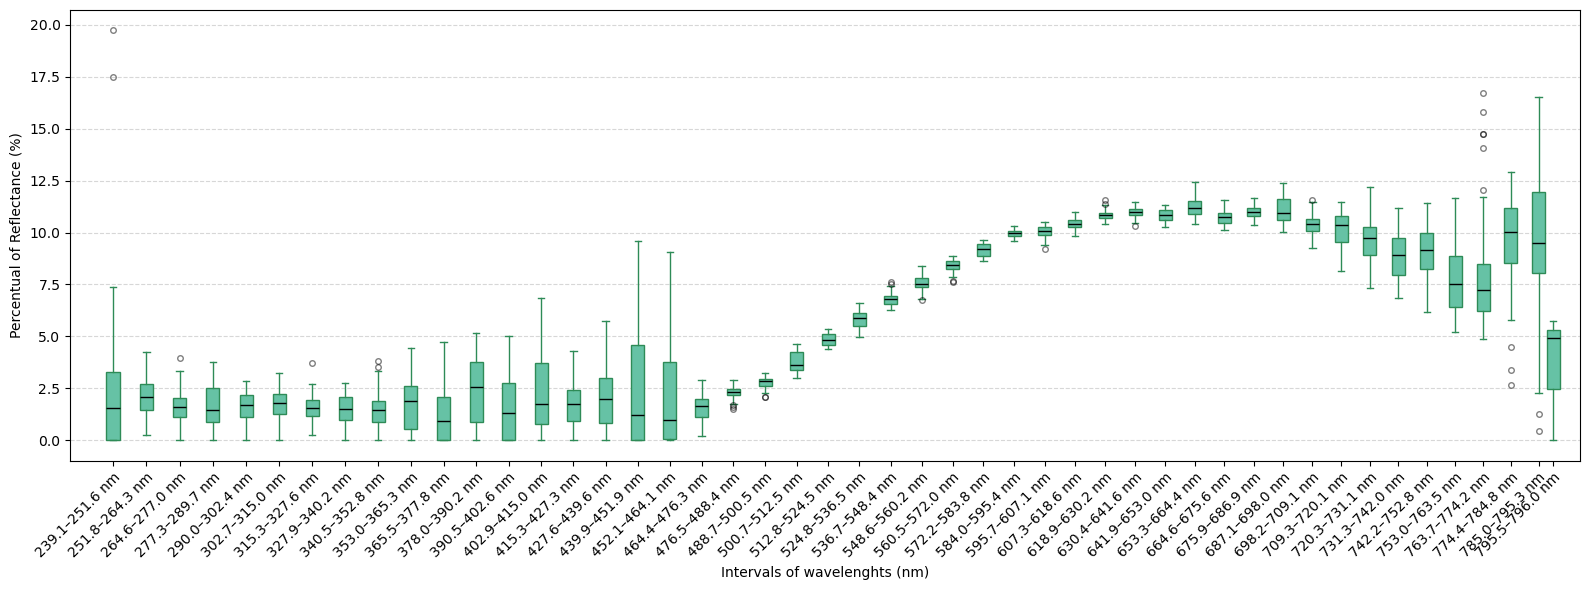

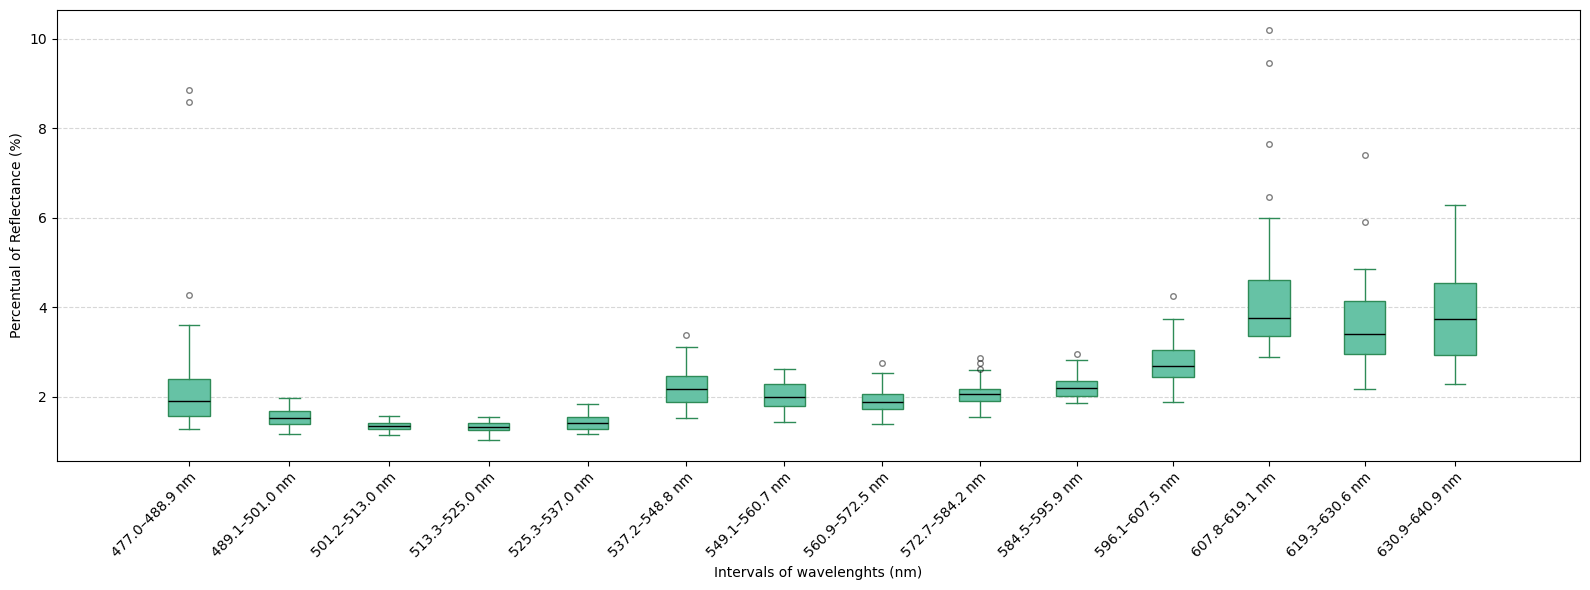

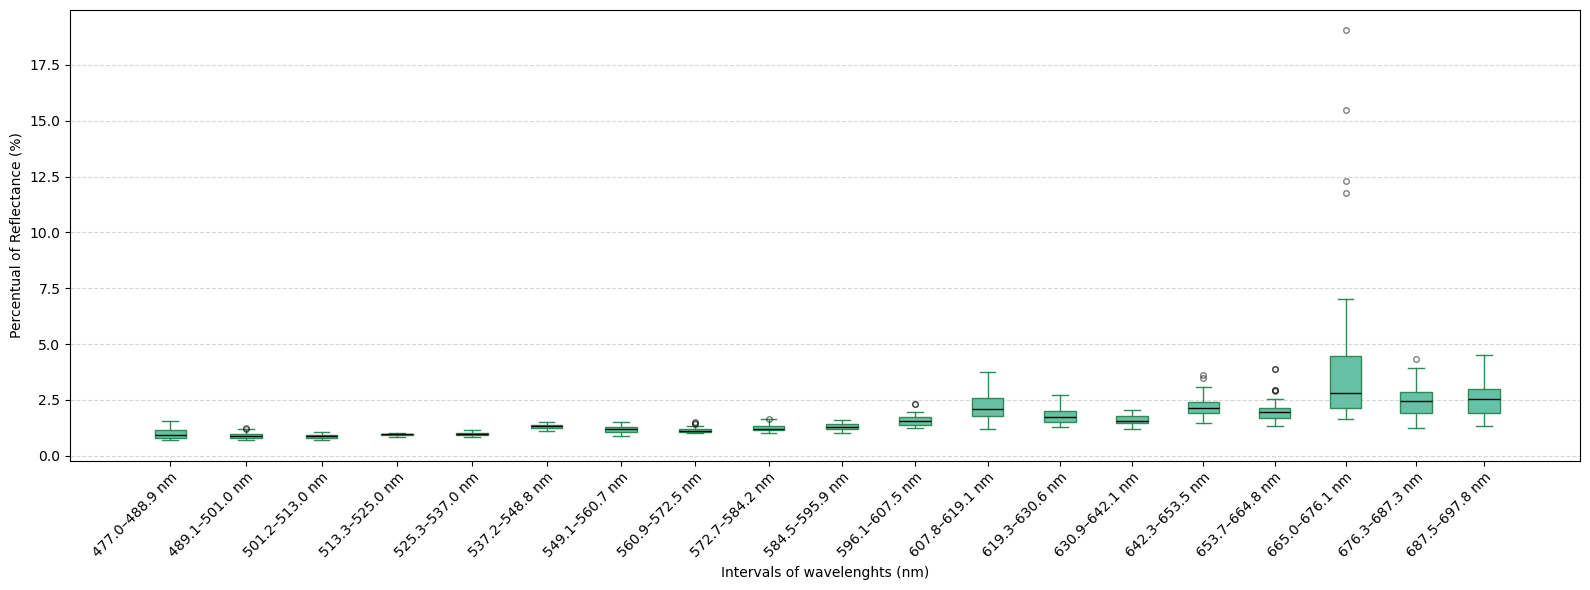

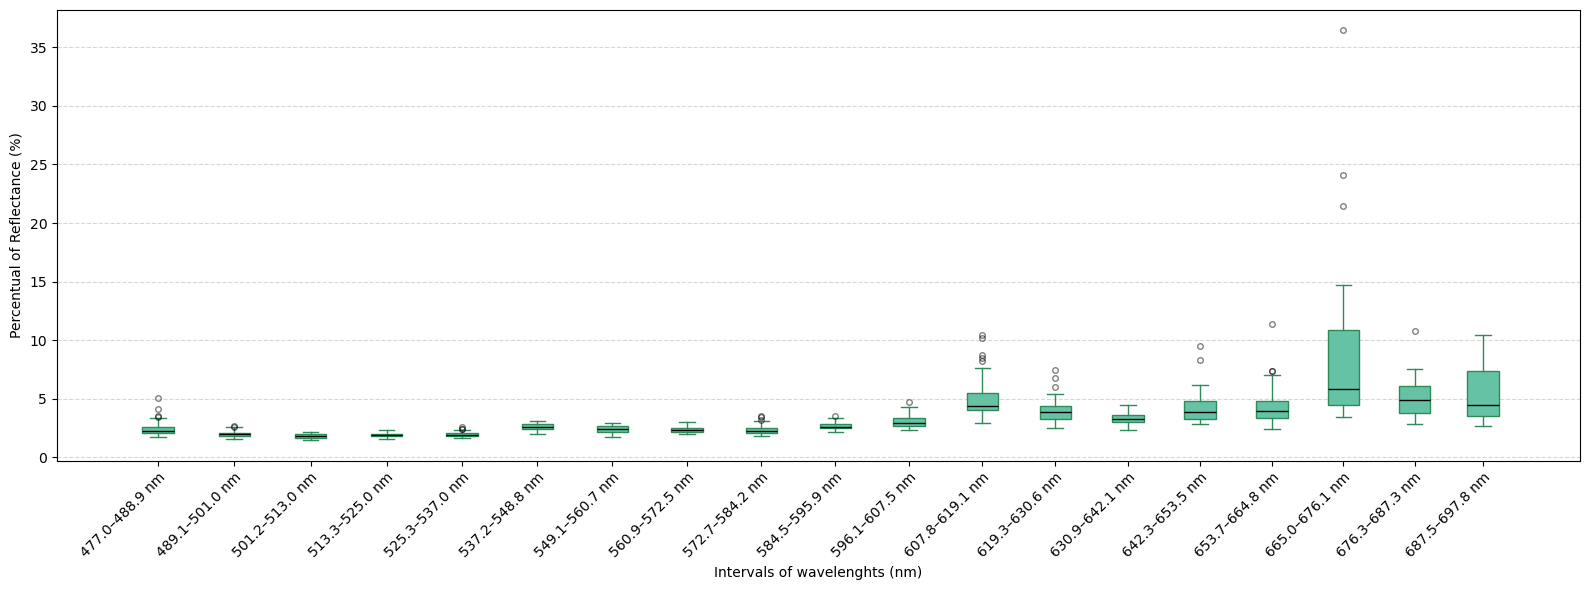

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Intervalo total do espectro (para gerar vetor de wavelength completo)
wavelength_start = 162.831
wavelength_end   = 988.726

# Define os intervalos de interesse para cada material (em comprimento de onda)
material_bounds = {
    'Gold':       [239, 796],
    'Silver':     [477, 641],
    'Copper':     [477, 698],
    'Aluminium':  [477, 698]
}

# Lista das amostras
materials = [
    (amostra_ouro_r, 'Gold'),
    (amostra_prata_r, 'Silver'),
    (amostra_cobre_r, 'Copper'),
    (amostra_aluminiu_r, 'Aluminium')
]

# Tamanho dos grupos (número de pontos por grupo)

group_size = 50

# Converte waves para numpy
waves = np.array(waves, dtype=float)

for sample, name in materials:
    
    dfi=(sample if name=='Gold' else sample/1000 )
    data_array = np.array(dfi.to_list(), dtype=float)

    # Extrai só o intervalo que nos interessa
    wl_min, wl_max = material_bounds[name]
    mask = (waves >= wl_min) & (waves <= wl_max)

    selected_wl = waves[mask]
    selected_data = data_array[mask]
    n_sel = len(selected_data)
    n_groups = n_sel // group_size

    groups = []
    group_positions = []
    group_labels = []

    # Grupos completos
    for i in range(n_groups):
        s = i * group_size
        e = (i + 1) * group_size
        grp_data = selected_data[s:e]
        grp_wl   = selected_wl[s:e]

        groups.append(grp_data)

        # posição no eixo = ponto médio do intervalo real
        center = (grp_wl[0] + grp_wl[-1]) / 2
        group_positions.append(center)

        group_labels.append(f"{grp_wl[0]:.1f}–{grp_wl[-1]:.1f} nm")

    # Último grupo parcial
    if n_sel % group_size != 0:
        s = n_groups * group_size
        grp_data = selected_data[s:]
        grp_wl   = selected_wl[s:]

        groups.append(grp_data)
        center = (grp_wl[0] + grp_wl[-1]) / 2
        group_positions.append(center)
        group_labels.append(f"{grp_wl[0]:.1f}–{grp_wl[-1]:.1f} nm")

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(16, 6))

    ax.boxplot(
        groups,
        positions=group_positions,
        widths= 5,  # largura aproximada de um ponto
        patch_artist=True,
        boxprops=dict(facecolor='#66C2A5', edgecolor='#2E8B57'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='#2E8B57'),
        capprops=dict(color='#2E8B57'),
        flierprops=dict(marker='o', markersize=4, color='#FF6F61', alpha=0.5)
    )

    ax.set_xticks(group_positions)
    ax.set_xticklabels(
        group_labels,
        rotation=45,
        ha='right',               # ancora à esquerda
        rotation_mode='anchor'   # faz o ha ser respeitado
    )
    ax.set_xlim(wl_min - 10, wl_max + 10)

    
    ax.set_xlabel("Intervals of wavelenghts (nm)")
    ax.set_ylabel("Percentual of Reflectance (%)")

    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Concentration of Elements

In [ ]:
grouped_indices

Ag Concentration    [2_m01, 2_m02, 2_m03, 2_m04, 2_m05, 2_m06, 2_m...
Al Concentration                                [7_m16, 7_m17, 7_m18]
Au Concentration    [1_m01, 1_m02, 1_m03, 1_m04, 1_m05, 1_m06, 1_m...
Cu Concentration    [4_m01, 4_m03, 4_m04, 4_m05, 4_m06, 4_m07, 4_m...
dtype: object

In [145]:
df_inv = (
    pd.Series(grouped_indices).explode()                       # turn each list into its own row
     .reset_index(name='Sample')      # bring the list-name into a column, call the values 'Sample'
     .rename(columns={'index':'Concentration'})  # rename the old index
     .set_index('Sample')             # make each sample ID the new index
)

df_total = df_total.join(df_inv)

df_total.rename(columns={'Concentration':'Material_XRF'},inplace=True)

df_total['Material_XRF']=df_total['Material_XRF'].str.split(' ').str[0]

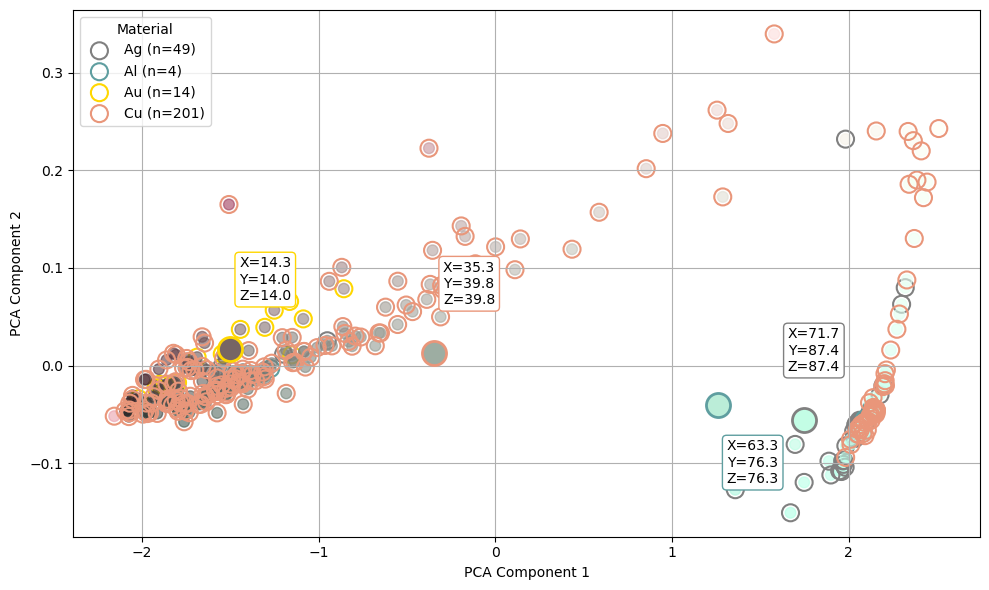

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def xyz_to_rgb(x, y, z):
    # Normalize XYZ into [0,1] if necessary
    if max(x, y, z) > 1.0:
        X, Y, Z = x/100.0, y/100.0, z/100.0
    else:
        X, Y, Z = x, y, z

    # D65→linear-sRGB
    M = np.array([
        [ 3.2404542, -1.5371385, -0.4985314],
        [-0.9692660,  1.8760108,  0.0415560],
        [ 0.0556434, -0.2040259,  1.0572252],
    ])
    rgb_lin = np.clip(M @ np.array([X, Y, Z]), 0, None)

    # sRGB gamma
    def _g(u):
        return 12.92*u if u <= 0.0031308 else 1.055*(u**(1/2.4)) - 0.055

    rgb = np.clip([_g(u) for u in rgb_lin], 0, 1)
    return tuple(rgb)

# — assume df has ['X','Y','Z'] + 'Material_XRF' (e.g. 'Au','Al','Ag','Cu')
df_total = df_total.dropna(subset=['X','Y','Z','Material_XRF'])

# 1) PCA on standardized XYZ
scaler = StandardScaler()
XYZs = scaler.fit_transform(df_total[['X','Y','Z']])
pcs = PCA(n_components=2).fit_transform(XYZs)
df_total['PCA1'], df_total['PCA2'] = pcs[:,0], pcs[:,1]

# 2) Each point’s fill‐colour
df_total['RGB'] = df_total.apply(lambda r: xyz_to_rgb(r.X, r.Y, r.Z), axis=1)

# 3) Define the group‐outline colours
group_color = {
    'Au': 'gold',
    'Al': 'cadetblue',
    'Ag': 'grey',
    'Cu': 'darksalmon'
}

fig, ax = plt.subplots(figsize=(10,6))

# Loop once per group
for label, sub in df_total.groupby('Material_XRF'):
    short = label.split()[0]  # e.g. "Au"
    circ_col = group_color.get(short, 'black')
    n = len(sub)

    # A) filled‐colour scatter (no legend)
    ax.scatter(
        sub.PCA1, sub.PCA2,
        color=sub.RGB.tolist(),
        alpha=0.6, s=60,
        label='_nolegend_'
    )

    # B) outline‐circle scatter (one legend entry per group with n)
    ax.scatter(
        sub.PCA1, sub.PCA2,
        facecolors='none',
        edgecolors=circ_col,
        s=150, linewidths=1.5,
        marker='o',
        label=f"{short} (n={n})"
    )

    # C) compute and plot the group‐mean
    mu_pca = sub[['PCA1','PCA2']].mean().values
    mu_xyz = sub[['X','Y','Z']].mean().values
    mu_rgb = xyz_to_rgb(*mu_xyz)

    ax.scatter(
        mu_pca[0], mu_pca[1],
        color=[mu_rgb],
        edgecolors=circ_col,
        s=300, linewidths=2.0,
        zorder=3,
        label='_nolegend_'
    )

    # D) annotate the centroid with its mean X,Y,Z
    mx, my, mz = mu_xyz
    txt = f"X={mx:.1f}\nY={my:.1f}\nZ={mz:.1f}"
    if label=='Al':

        ax.text(
        mu_pca[0] + 0.05, mu_pca[1] - 0.08,  # small offset
        txt,
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=circ_col, lw=1)
    )
    elif label=='Ag':
        ax.text(
        mu_pca[0] - 0.09, mu_pca[1] + 0.05,  # small offset
        txt,
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=circ_col, lw=1)
    )
    else:
        ax.text(
            mu_pca[0] + 0.05, mu_pca[1] + 0.05,  # small offset
            txt,
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=circ_col, lw=1)
        )

# 4) Final touches: legend, labels, grid
ax.legend(title="Material", loc='upper left', frameon=True)
#ax.set_title("PCA of Samples\nFilled by Measured Colour, Outlined by Group")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.grid(True)
plt.tight_layout()
plt.show()


# Group Mass

In [41]:
df_mass_d=df_total[group_mass].describe()
df_mass_d.columns=['Mass - All Samples']
print(df_mass_d.to_latex())

\begin{tabular}{lr}
\toprule
 & Mass - All Samples \\
\midrule
count & 268.000000 \\
mean & 9.387612 \\
std & 7.388671 \\
min & 0.490000 \\
25% & 4.000000 \\
50% & 7.380000 \\
75% & 12.382500 \\
max & 37.560000 \\
\bottomrule
\end{tabular}



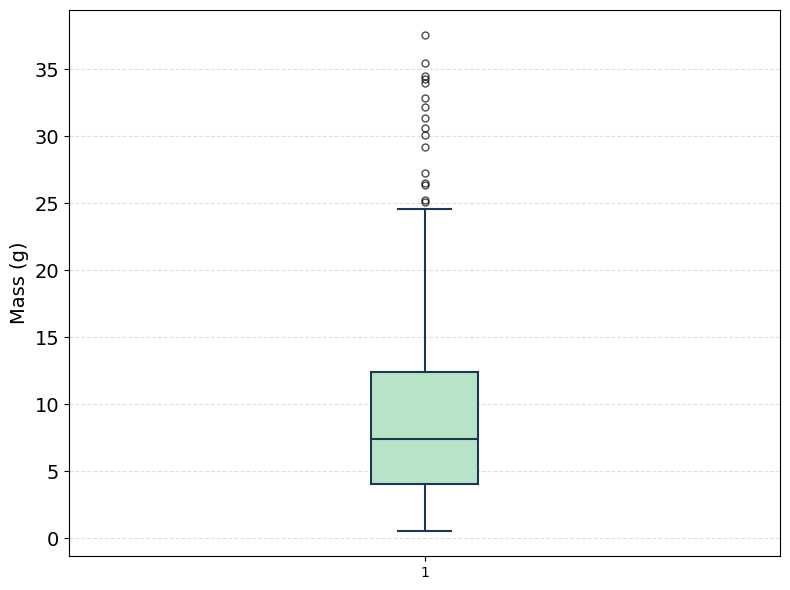

In [139]:
import matplotlib.pyplot as plt

# Cores azul pastel
azul_pastel = '#a8dadc'
azul_escuro = '#1d3557'

# Criar a figura
fig, ax = plt.subplots(figsize=(8, 6))

# Criar boxplot com patch_artist para personalização
box = ax.boxplot(df_total[group_mass], patch_artist=True)

# Estilo das caixas
for box_element in box['boxes']:
    box_element.set(facecolor='#b7e4c7', edgecolor=azul_escuro, linewidth=1.5)

# Estilo das linhas (whiskers, caps e medianas)
for element in ['whiskers', 'caps', 'medians']:
    for line in box[element]:
        line.set(color=azul_escuro, linewidth=1.5)

# Outliers em azul escuro
for flier in box['fliers']:
    flier.set(marker='o', color=azul_escuro, markersize=5, alpha=0.7)

# Título e labels
#ax.set_title('Distribution of Mass', fontsize=16)
ax.set_ylabel('Mass (g)', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
# Grid leve
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [44]:
df_describes_groups=pd.DataFrame()
for e in grouped_indices.index:
    df_mass_d=df_total.loc[grouped_indices[e],group_mass].describe()
    df_mass_d.columns=[e[:2].strip()+' Group']
    df_describes_groups=pd.concat([df_describes_groups,df_mass_d],axis=1)

In [46]:
print(df_describes_groups.round(2).to_latex().replace('.000000','').replace('00000','').replace('0000',''))

\begin{tabular}{lrrrr}
\toprule
 & Ag Group & Al Group & Au Group & Cu Group \\
\midrule
count & 49 & 4 & 14 & 201 \\
mean & 11.59 & 0.5 & 7.09 & 9.19 \\
std & 5.94 & 0.01 & 6.12 & 7.67 \\
min & 1.24 & 0.49 & 0.83 & 1.49 \\
25% & 6.59 & 0.49 & 1.04 & 4.02 \\
50% & 12.44 & 0.5 & 7.9 & 6.43 \\
75% & 14.2 & 0.51 & 12.52 & 11.64 \\
max & 29.15 & 0.51 & 17.72 & 37.56 \\
\bottomrule
\end{tabular}



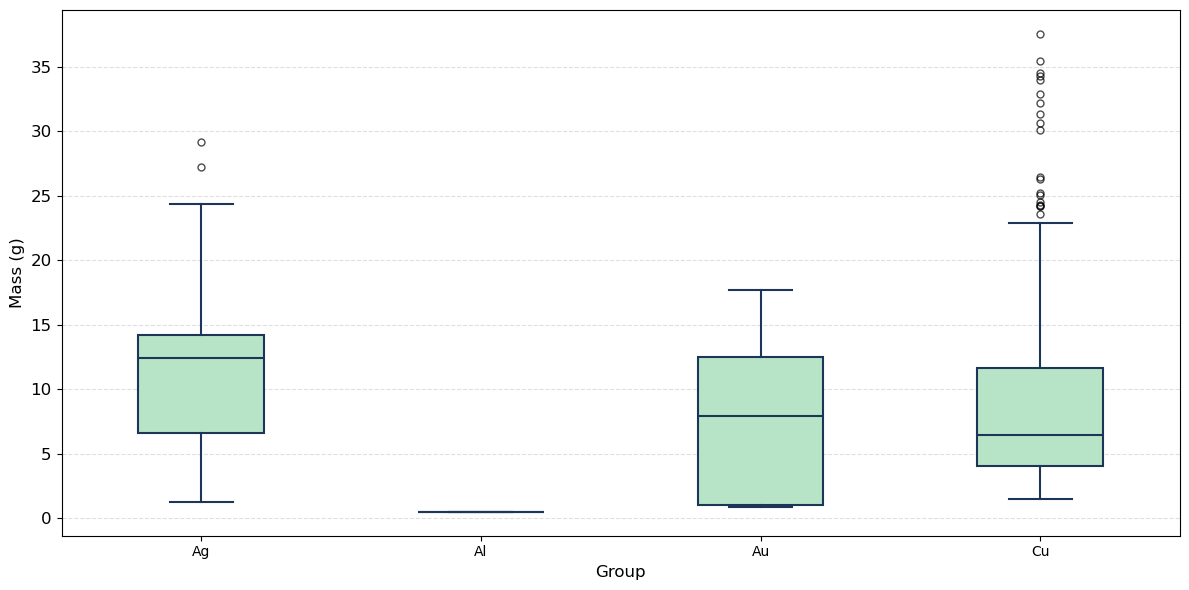

In [143]:
data = [df_total.loc[grouped_indices[e], group_mass].iloc[:, 0].to_list() for e in grouped_indices.index]

# Cores azul pastel
azul_pastel = '#a8dadc'
azul_escuro = '#1d3557'

# Criar a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Criar boxplot
box = ax.boxplot(data, patch_artist=True)

# Estilo das caixas
for box_element in box['boxes']:
    box_element.set(facecolor='#b7e4c7', edgecolor=azul_escuro, linewidth=1.5)

# Estilo das linhas (whiskers, caps e medianas)
for element in ['whiskers', 'caps', 'medians']:
    for line in box[element]:
        line.set(color=azul_escuro, linewidth=1.5)

# Outliers em azul
for flier in box['fliers']:
    flier.set(marker='o', color=azul_escuro, markersize=5, alpha=0.7)

# Labels do eixo X
ax.set_xticklabels([e[:2].strip() for e in grouped_indices.index], ha='center')
ax.tick_params(axis='y', labelsize=12)
# Título e labels
# ax.set_title('Distribution per Group', fontsize=14)
ax.set_xlabel('Group', fontsize=12)
ax.set_ylabel('Mass (g)', fontsize=12)

# Grid leve
ax.yaxis.grid(True, linestyle='--', alpha=0.4)


plt.tight_layout()
plt.show()

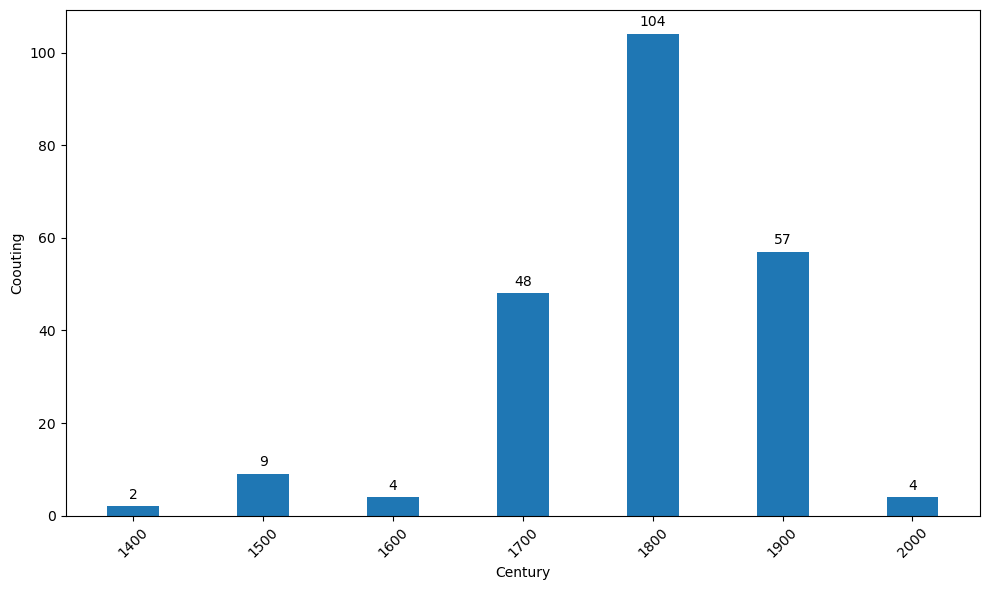

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Suponha que a coluna de ano se chama 'Year'
group_year = 'Year'

# Criar coluna com a década
df['Year_decade'] = (df[group_year] // 100) * 100  # Corrigido para décadas (ex: 1990, 2000, etc.)

# Contar as ocorrências por década
counts = df['Year_decade'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, width=40)

# Adicionar as anotações acima de cada barra
for idx, value in enumerate(counts.values):
    plt.text(counts.index[idx], value + 1, str(value), ha='center', va='bottom')

plt.xlabel('Century')
plt.ylabel('Coouting')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


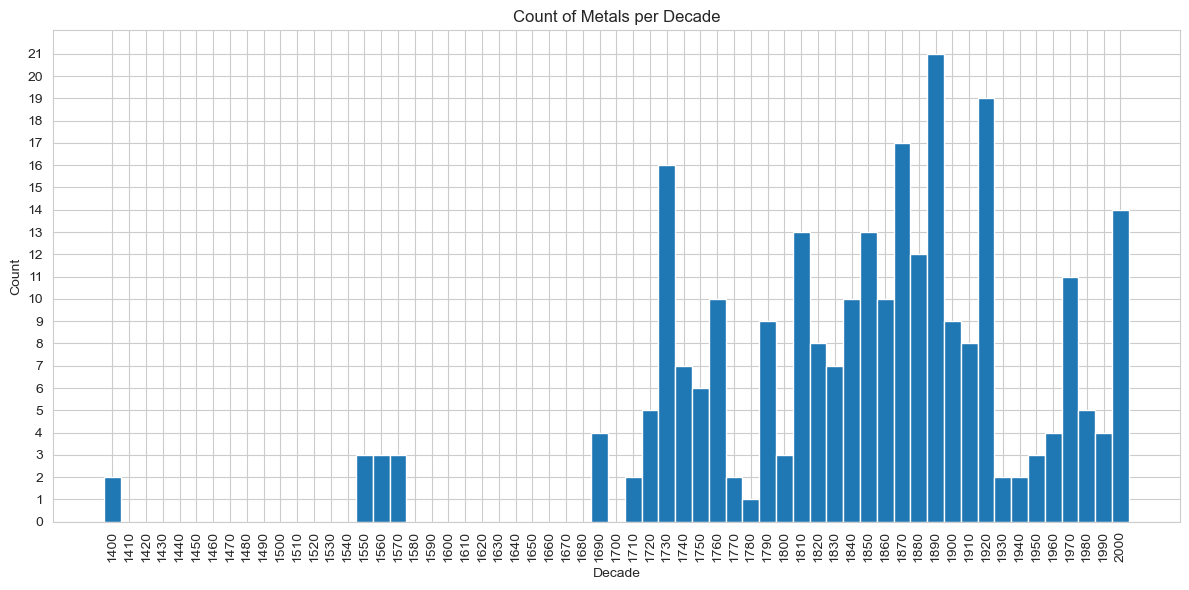

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Suponha que 'grouped_indices' seja um objeto com índices para agrupar
# Ex: grouped_indices = df.groupby('Metal')['index'].apply(list)

# Criar coluna com a década
df_total['Year_decade'] = (df_total['Year'] // 10) * 10

# Lista completa de décadas para garantir eixo x consistente
min_decade = int(df['Year'].min() // 10 * 10)
max_decade = int(df['Year'].max() // 10 * 10)
all_decades = list(range(min_decade, max_decade + 10, 10))


# Preparar o gráfico
plt.figure(figsize=(12, 6))
# sns.set_style("whitegrid")


# Obter contagens por década
decade_counts = (df_total.loc[:, 'Year_decade']
                    .value_counts()
                    .reindex(all_decades, fill_value=0)
                    .sort_index())


plt.bar(decade_counts.index, decade_counts.values, width=10)

# Estilização do eixo y
max_count = df_total['Year_decade'].value_counts().max()
plt.yticks(np.arange(0, max_count + 1, 1))

# Eixo x e labels
plt.xticks(ticks=all_decades, rotation=90, ha='center')
plt.xlabel("Decade")
plt.ylabel("Count")
plt.title("Count of Metals per Decade")
plt.tight_layout()
plt.show()

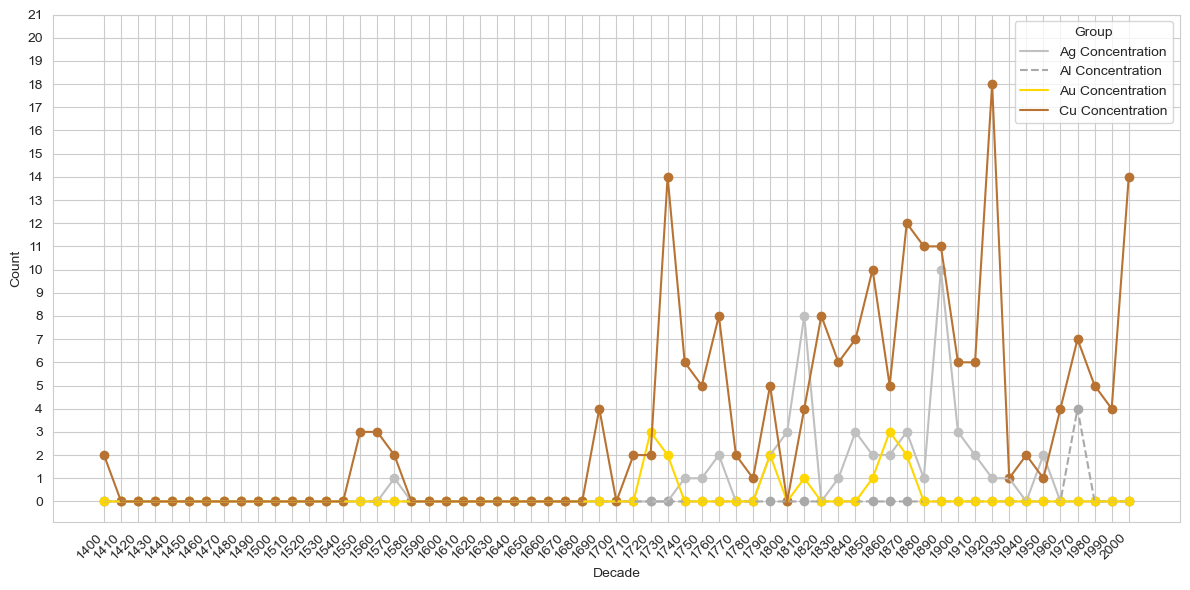

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Suponha que 'grouped_indices' seja um objeto com índices para agrupar
# Ex: grouped_indices = df.groupby('Metal')['index'].apply(list)

# Criar coluna com a década
df_total['Year_decade'] = (df_total['Year'] // 10) * 10

# Lista completa de décadas para garantir eixo x consistente
min_decade = int(df['Year'].min() // 10 * 10)
max_decade = int(df['Year'].max() // 10 * 10)
all_decades = list(range(min_decade, max_decade + 10, 10))

# Paleta com cores inspiradas nos metais
element_colors = {
    'Ag Concentration': '#C0C0C0',  # prata
    'Al Concentration': '#A9A9A9',  # alumínio
    'Au Concentration': '#FFD700',  # ouro
    'Cu Concentration': '#B87333',  # cobre
}

# Preparar o gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot por grupo
for label in grouped_indices.index:
    # Obter contagens por década
    decade_counts = (df_total.loc[grouped_indices[label], 'Year_decade']
                     .value_counts()
                     .reindex(all_decades, fill_value=0)
                     .sort_index())
    
    color = element_colors.get(label, '#7f7f7f')  # cor padrão se o label não estiver no dicionário
#    print(label)
    if label!='Al Concentration':
        plt.plot(decade_counts.index, decade_counts.values, label=label, c=color)
    else:
        plt.plot(decade_counts.index, decade_counts.values,'--', label=label, c=color)
    plt.scatter(decade_counts.index, decade_counts.values, c=color)

# Estilização do eixo y
max_count = df_total['Year_decade'].value_counts().max()
plt.yticks(np.arange(0, max_count + 1, 1))

# Eixo x e labels
plt.xticks(ticks=all_decades, rotation=45, ha='right')
plt.xlabel("Decade")
plt.ylabel("Count")
#plt.title("Count of Metals per Decade")
plt.legend(title="Group")
plt.tight_layout()
plt.show()


In [52]:
df_describes_year_groups_d=pd.DataFrame()
for e in grouped_indices.index:
    df_describes_year_groups=pd.DataFrame(df_total.loc[grouped_indices[e],group_year].describe())
    df_describes_year_groups.columns=[e[:2].strip()+' Group']
    df_describes_year_groups_d=pd.concat([df_describes_year_groups,df_describes_year_groups_d],axis=1)

In [53]:
print(df_describes_year_groups_d.round(2).to_latex().replace('.000000','').replace('00000','').replace('0000',''))

\begin{tabular}{lrrrr}
\toprule
 & Cu Group & Au Group & Al Group & Ag Group \\
\midrule
count & 201 & 14 & 4 & 49 \\
mean & 1848.37 & 1802.57 & 1973.75 & 1851.06 \\
std & 111.5 & 63.97 & 1.71 & 65.56 \\
min & 1403 & 1720 & 1972 & 1575 \\
25% & 1765 & 1731 & 1972.75 & 1812 \\
50% & 1873 & 1804 & 1973.5 & 1862 \\
75% & 1924 & 1861.75 & 1974.5 & 1893 \\
max & 2002 & 1879 & 1976 & 1954 \\
\bottomrule
\end{tabular}



In [ ]:
df_seculos=df.copy()
df_seculos['Seculo']=((df['Year']//100)*100).astype(str)
df_seculos['Seculo'][(df_seculos['Seculo']=='1400')|(df_seculos['Seculo']=='1500')|(df_seculos['Seculo']=='1600')|(df_seculos['Seculo']=='1700')]='<1800'
df_seculos['Seculo'][(df_seculos['Seculo']=='1900')|(df_seculos['Seculo']=='2000')]='>1800'
df_seculos.drop(['Year'],axis=1,inplace=True)

In [ ]:
df_seculos['Seculo'].value_counts()

Seculo
1800     104
<1800     63
>1800     61
Name: count, dtype: int64